# Ï¥àÍ∏∞ ÏÑ§Ï†ï Î∞è Î™®Îìà Î∂àÎü¨Ïò§Í∏∞

In [1]:
import warnings 

warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import calmap
import calplot
from vega_datasets import data as vds
from datetime import datetime
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap



matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
ColorGrid='#FEFEFE'
ColorLine1='#678BC4'
ColorLine2='#1D3059'

plt.rc('font', family='Malgun Gothic') 
plt.style.use('fivethirtyeight')
for param in ['figure.facecolor','axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#FEFEFE'  # Î∞∞Í≤ΩÏÉâÍπî 

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '#050B1C'  # very light grey
plt.rcParams['axes.facecolor']='#E8EEF2'

pd.set_option('mode.chained_assignment',  None)

In [4]:
co=['#345595','#678BC4']
def pointing(x,y,ran,arr,m,up,bboxsize): # Ï†ê Ï∞çÎäî Ìï®Ïàò, x : index, y : index, ran : Î≤îÏúÑ, m : max(True) min(False) ,up : ÏúÑÏπò Ï°∞Ï†ï, bboxsize : Î∞ïÏä§ ÏÇ¨Ïù¥Ï¶à
    x=x[ran[0]:ran[1]]
    y=y[ran[0]:ran[1]]
    if m==True:
        arr.scatter(x[np.argmax(y)], np.max(y), 
                c=co[0],s=50, zorder=20)
        arr.text(x[np.argmax(y)], np.max(y)+up, s='{0}.{1:02d}.{2:02d}\n{3}'.format(x[np.argmax(y)].year, x[np.argmax(y)].month, x[np.argmax(y)].day, int(np.max(y))), fontweight='bold',
             va='bottom', ha='center', 
             bbox=dict(boxstyle='round,pad=0.3', fc=co[0], ec='black', alpha=0.3), size=bboxsize)
    
    else:
        arr.scatter(x[np.argmin(y)], np.min(y), 
                c=co[1],s=50, zorder=20)
        arr.text(x[np.argmin(y)], np.min(y)-up, s='{0}.{1:02d}.{2:02d}\n{3}'.format(x[np.argmin(y)].year, x[np.argmin(y)].month, x[np.argmin(y)].day, int(np.min(y))), fontweight='bold',
             va='top', ha='center', 
             bbox=dict(boxstyle='round,pad=0.3', fc=co[1], ec='black', alpha=0.3), size=bboxsize)
    return arr

In [5]:
def show_values_on_bars(axs, sizet):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() +10000
            value = round(p.get_height())
            ax.text(_x, _y, value, ha="center",size=sizet) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [6]:
def q(a):
    b=a//4
    li=[0,b]
    sumj=b
    for i in range(3):
        li.append(sumj+1)
        li.append(sumj+b)
        sumj+=b
    li.pop(-1)
    li.append(a)
    return li
a=q(62)
print(a)

[0, 15, 16, 30, 31, 45, 46, 62]


In [7]:
def fill_under(ax):
    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]

        # Get the xy data from the lines so that we can shade
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]

    ax.fill_between(x1,y1, color=ColorLine1, alpha=0.1)
    return ax

In [8]:
# cmap custom colors~~
# create one colormaps
N = 256
a=[52, 85, 149]

one = np.ones((N, 4)) # 242, 133, 133
one[:, 0] = np.linspace(a[0]/256, 1, N) # R = 255
one[:, 1] = np.linspace(a[1]/256, 1, N) # G = 232
one[:, 2] = np.linspace(a[2]/256, 1, N)  # B = 11
one_cmp  = ListedColormap(one,reversed)
two = np.ones((N, 4)) # 242, 242, 242
two[:, 0] = np.linspace(35/256, 1, N)
two[:, 1] = np.linspace(63/256, 1, N)
two[:, 2] = np.linspace(103/256, 1, N)
two_cmp= ListedColormap(two)

newcolors2 = np.vstack((one_cmp(np.linspace(1, 0, 128))))
newcolors1 = np.vstack((one_cmp(np.linspace(0, 1, 128)),two_cmp(np.linspace(1, 0, 128))))
double = ListedColormap(newcolors2, name='double')
double2=ListedColormap(newcolors1, name='double2')

# COVID19 ÏßÑÌñâ ÏÉÅÌô©

In [9]:
# raw ÏΩîÎ°úÎÇò Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

covid_data=pd.read_csv('data/Covid_case.csv')

In [10]:
# ÌïÑÏöî ÏπºÎüºÎßå Ï∂îÏ∂ú
# ÏΩîÎ°úÎÇò ÏùºÎ≥Ñ ÌôïÏßÑÏûê Ïàò ÏπºÎüº Ï∂îÍ∞Ä
# Ï†ïÏàòÌòï stateDtÎ•º DatetimeÌòï stateDtÎ°ú Î≥ÄÌôò ÌõÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï

covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê','decideCnt','deathCnt']]
covid_data_new.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê','ÎàÑÏ†ÅÌôïÏßÑÏûê','ÎàÑÏ†ÅÏÇ¨ÎßùÏûê']
covid_data_new.index=pd.to_datetime(covid_data_new['ÏùºÏûê'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('ÏùºÏûê',axis=1)
covid_data_new['ÎÖÑÎèÑ']=covid_data_new.index.year
covid_data_new['Ïõî']=covid_data_new.index.month
covid_data_new.head()

ÏùºÎ≥ÑÌôïÏßÑÏûê   ÎàÑÏ†ÅÌôïÏßÑÏûê   ÎàÑÏ†ÅÏÇ¨ÎßùÏûê    ÎÖÑÎèÑ  Ïõî
ÏùºÏûê                                         
2021-09-25     NaN  298401  2441.0  2021  9
2021-09-24  3269.0  295132  2434.0  2021  9
2021-09-23  2433.0  292699  2427.0  2021  9
2021-09-22  1716.0  290983  2419.0  2021  9
2021-09-21  1720.0  289263  2413.0  2021  9

In [11]:
# ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏàò Î∂ÑÌè¨ ÌôïÏù∏

covid_data_new.describe().ÏùºÎ≥ÑÌôïÏßÑÏûê

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: ÏùºÎ≥ÑÌôïÏßÑÏûê, dtype: float64

<AxesSubplot:title={'center':'\nCOVID-19 ÏùºÏûêÎ≥Ñ ÎàÑÏ†Å ÌôïÏßÑÏûê\n'}, xlabel='ÏùºÏûê', ylabel='ÎàÑÏ†ÅÌôïÏßÑÏûê'>

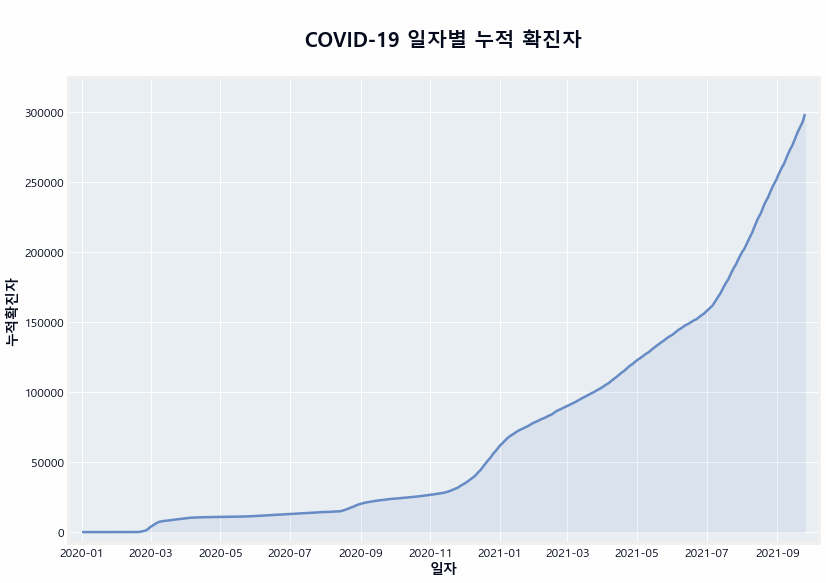

In [12]:
# ÏΩîÎ°úÎÇò ÎàÑÏ†Å ÌôïÏßÑÏûê ÏãúÍ∞ÅÌôî

plt.figure(figsize=(12,8))
plt.title('\nCOVID-19 ÏùºÏûêÎ≥Ñ ÎàÑÏ†Å ÌôïÏßÑÏûê\n', weight='bold')
plt.grid(color=ColorGrid)  # bluish dark grey, but slightly lighter than background

plt.margins(x=0.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ÏùºÏûê',fontdict={'weight': 'bold', 'size': 14})
plt.ylabel('ÎàÑÏ†ÅÌôïÏßÑÏûê',fontdict={'weight': 'bold', 'size': 14})

ax=sns.lineplot(data=covid_data_new, x='ÏùºÏûê', y='ÎàÑÏ†ÅÌôïÏßÑÏûê',linewidth='2.5',color=ColorLine1)
ax.set_ylim([-8000,325000])
fill_under(ax)

<AxesSubplot:title={'center':'\n2020ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ\n'}>

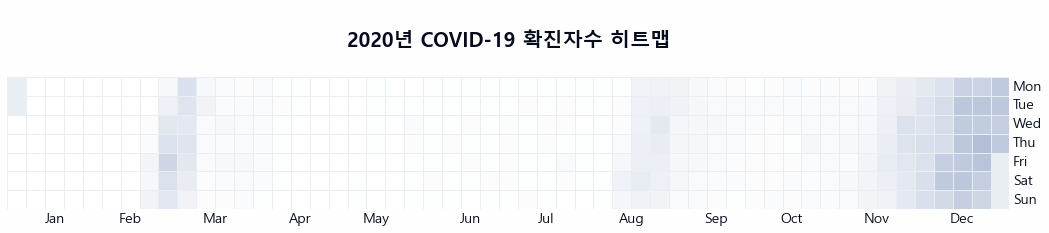

In [13]:
#ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Ïàò ÌûàÌä∏Îßµ(2020)

plt.figure(figsize=(16,8))
plt.title('\n2020ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ\n', weight='bold')
calmap.yearplot(data=covid_data_new['ÏùºÎ≥ÑÌôïÏßÑÏûê'],year=2020,cmap=double)

<AxesSubplot:title={'center':'\n2021ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ\n'}>

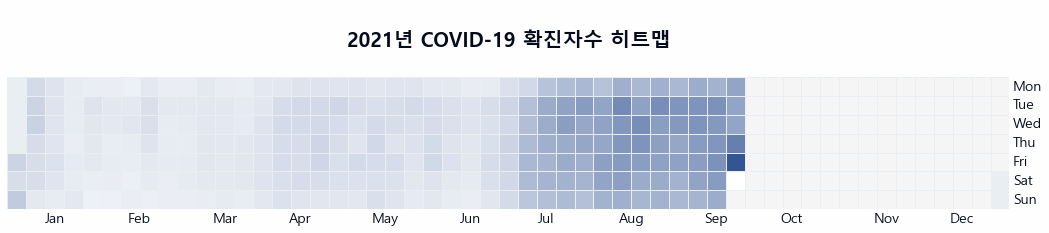

In [14]:
#ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Ïàò ÌûàÌä∏Îßµ(2021)

plt.figure(figsize=(16,8))
plt.title('\n2021ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ\n', weight='bold')
calmap.yearplot(data=covid_data_new['ÏùºÎ≥ÑÌôïÏßÑÏûê'],year=2021, cmap=double)

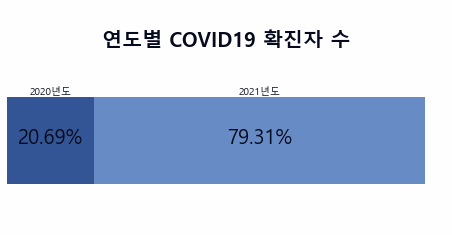

In [15]:
# ÏΩîÎ°úÎÇò ÎÖÑÎèÑÎ≥Ñ ÌôïÏßÑÏûê ÏãúÍ∞ÅÌôî

year_covid=pd.DataFrame(covid_data_new.groupby('ÎÖÑÎèÑ')['ÏùºÎ≥ÑÌôïÏßÑÏûê'].sum()).T

total_decideCnt=year_covid[2020]+year_covid[2021]

ax = year_covid.plot(kind='barh', stacked=True, rot=0,figsize=(7,3),color=['#345595', '#678BC4'])
plt.title('\nÏó∞ÎèÑÎ≥Ñ COVID19 ÌôïÏßÑÏûê Ïàò',weight='bold')
for idx, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"\n\n{(width*100)/int(total_decideCnt):.2f}%", xy=(left+width/2, (bottom+height)*3/5), ha='center', va='center',fontsize=20)
    ax.annotate(f"{2020+idx}ÎÖÑÎèÑ", xy=(left+width/2, bottom+height), ha='center', va='bottom',fontsize=10)
plt.box(False)
ax.set_xticks([])
ax.set_yticks([])
ax.get_legend().remove()
plt.show()

<AxesSubplot:title={'center':'\nCOVID-19 ÏùºÏûêÎ≥Ñ ÌôïÏßÑÏûê Ïàò\n'}, xlabel='ÏùºÏûê', ylabel='ÏùºÎ≥ÑÌôïÏßÑÏûê'>

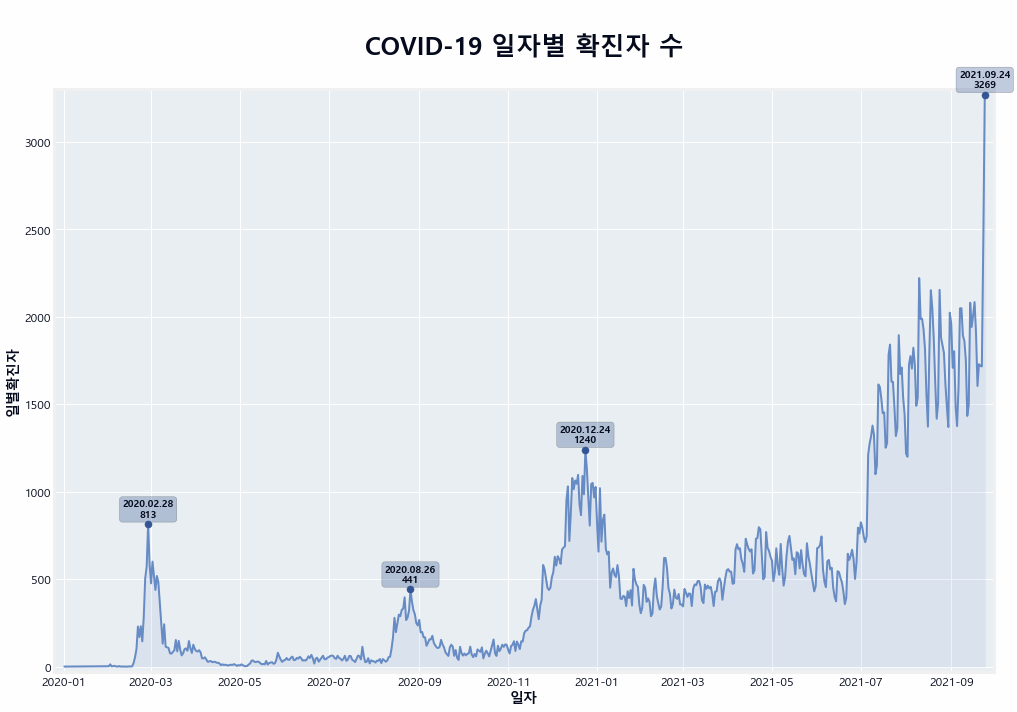

In [16]:
# ÏΩîÎ°úÎÇò ÏùºÎ≥Ñ ÌôïÏßÑÏûê ÏãúÍ∞ÅÌôî

plt.figure(figsize=(15,10))
plt.title('\nCOVID-19 ÏùºÏûêÎ≥Ñ ÌôïÏßÑÏûê Ïàò\n', weight='bold', size=25)
plt.grid(color=ColorGrid)  # bluish dark grey, but slightly lighter than background

plt.margins(x=0.01,y=0.01)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ÏùºÏûê',fontdict={'weight': 'bold', 'size': 14})
plt.ylabel('ÏùºÎ≥ÑÌôïÏßÑÏûê',fontdict={'weight': 'bold', 'size': 14})

ax=plt.gca()
x=covid_data_new.index
y=covid_data_new.ÏùºÎ≥ÑÌôïÏßÑÏûê

ax=pointing(x,y,[0,20],ax,True,30,10)
ax=pointing(x,y,[200,300],ax,True,30,10)
ax=pointing(x,y,[350,500],ax,True,30,10)
ax=pointing(x,y,[550,800],ax,True,30,10)


ax=sns.lineplot(data=covid_data_new, x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',color=ColorLine1, linewidth='2')
fill_under(ax)

ÏúÑ ÏÑ∏Í∞ÄÏßÄ Í∑∏ÎûòÌîÑÏùò ÏùºÎ≥Ñ/ÎÖÑÎèÑÎ≥Ñ ÌôïÏßÑÏûê ÌôïÏù∏ Í≤∞Í≥º, 2020ÎÖÑ 3Ïõî, 2020ÎÖÑ 8Ïõî, 2020ÎÖÑ 12Ïõî, 2021ÎÖÑ 8Ïõî Ï¥ù 4Ï∞®Î°ÄÏùò ÎåÄÏú†ÌñâÏù¥ Î∞úÏÉù ÌñàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§

In [17]:
# ÎåÄÏú†Ìñâ Í∏∞Í∞Ñ ÌôïÏßÑÏûê Ïàò Ï∂îÏ∂ú

covid_data_1st_pandemic=covid_data_new[(covid_data_new.ÎÖÑÎèÑ==2020) & ((covid_data_new.Ïõî==2)|(covid_data_new.Ïõî==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.ÎÖÑÎèÑ==2020) & ((covid_data_new.Ïõî==8)|(covid_data_new.Ïõî==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.ÎÖÑÎèÑ==2020) & ((covid_data_new.Ïõî==12)|(covid_data_new.Ïõî==11)))|
                ((covid_data_new.ÎÖÑÎèÑ==2021)&((covid_data_new.Ïõî==1)|(covid_data_new.Ïõî==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.ÎÖÑÎèÑ==2021) & ((covid_data_new.Ïõî==6)|(covid_data_new.Ïõî==7)|(covid_data_new.Ïõî==8)|(covid_data_new.Ïõî==9))]

<AxesSubplot:title={'center':'\n4Ï∞® ÎåÄÏú†Ìñâ\n'}, xlabel='ÏùºÏûê', ylabel='ÏùºÎ≥ÑÌôïÏßÑÏûê'>

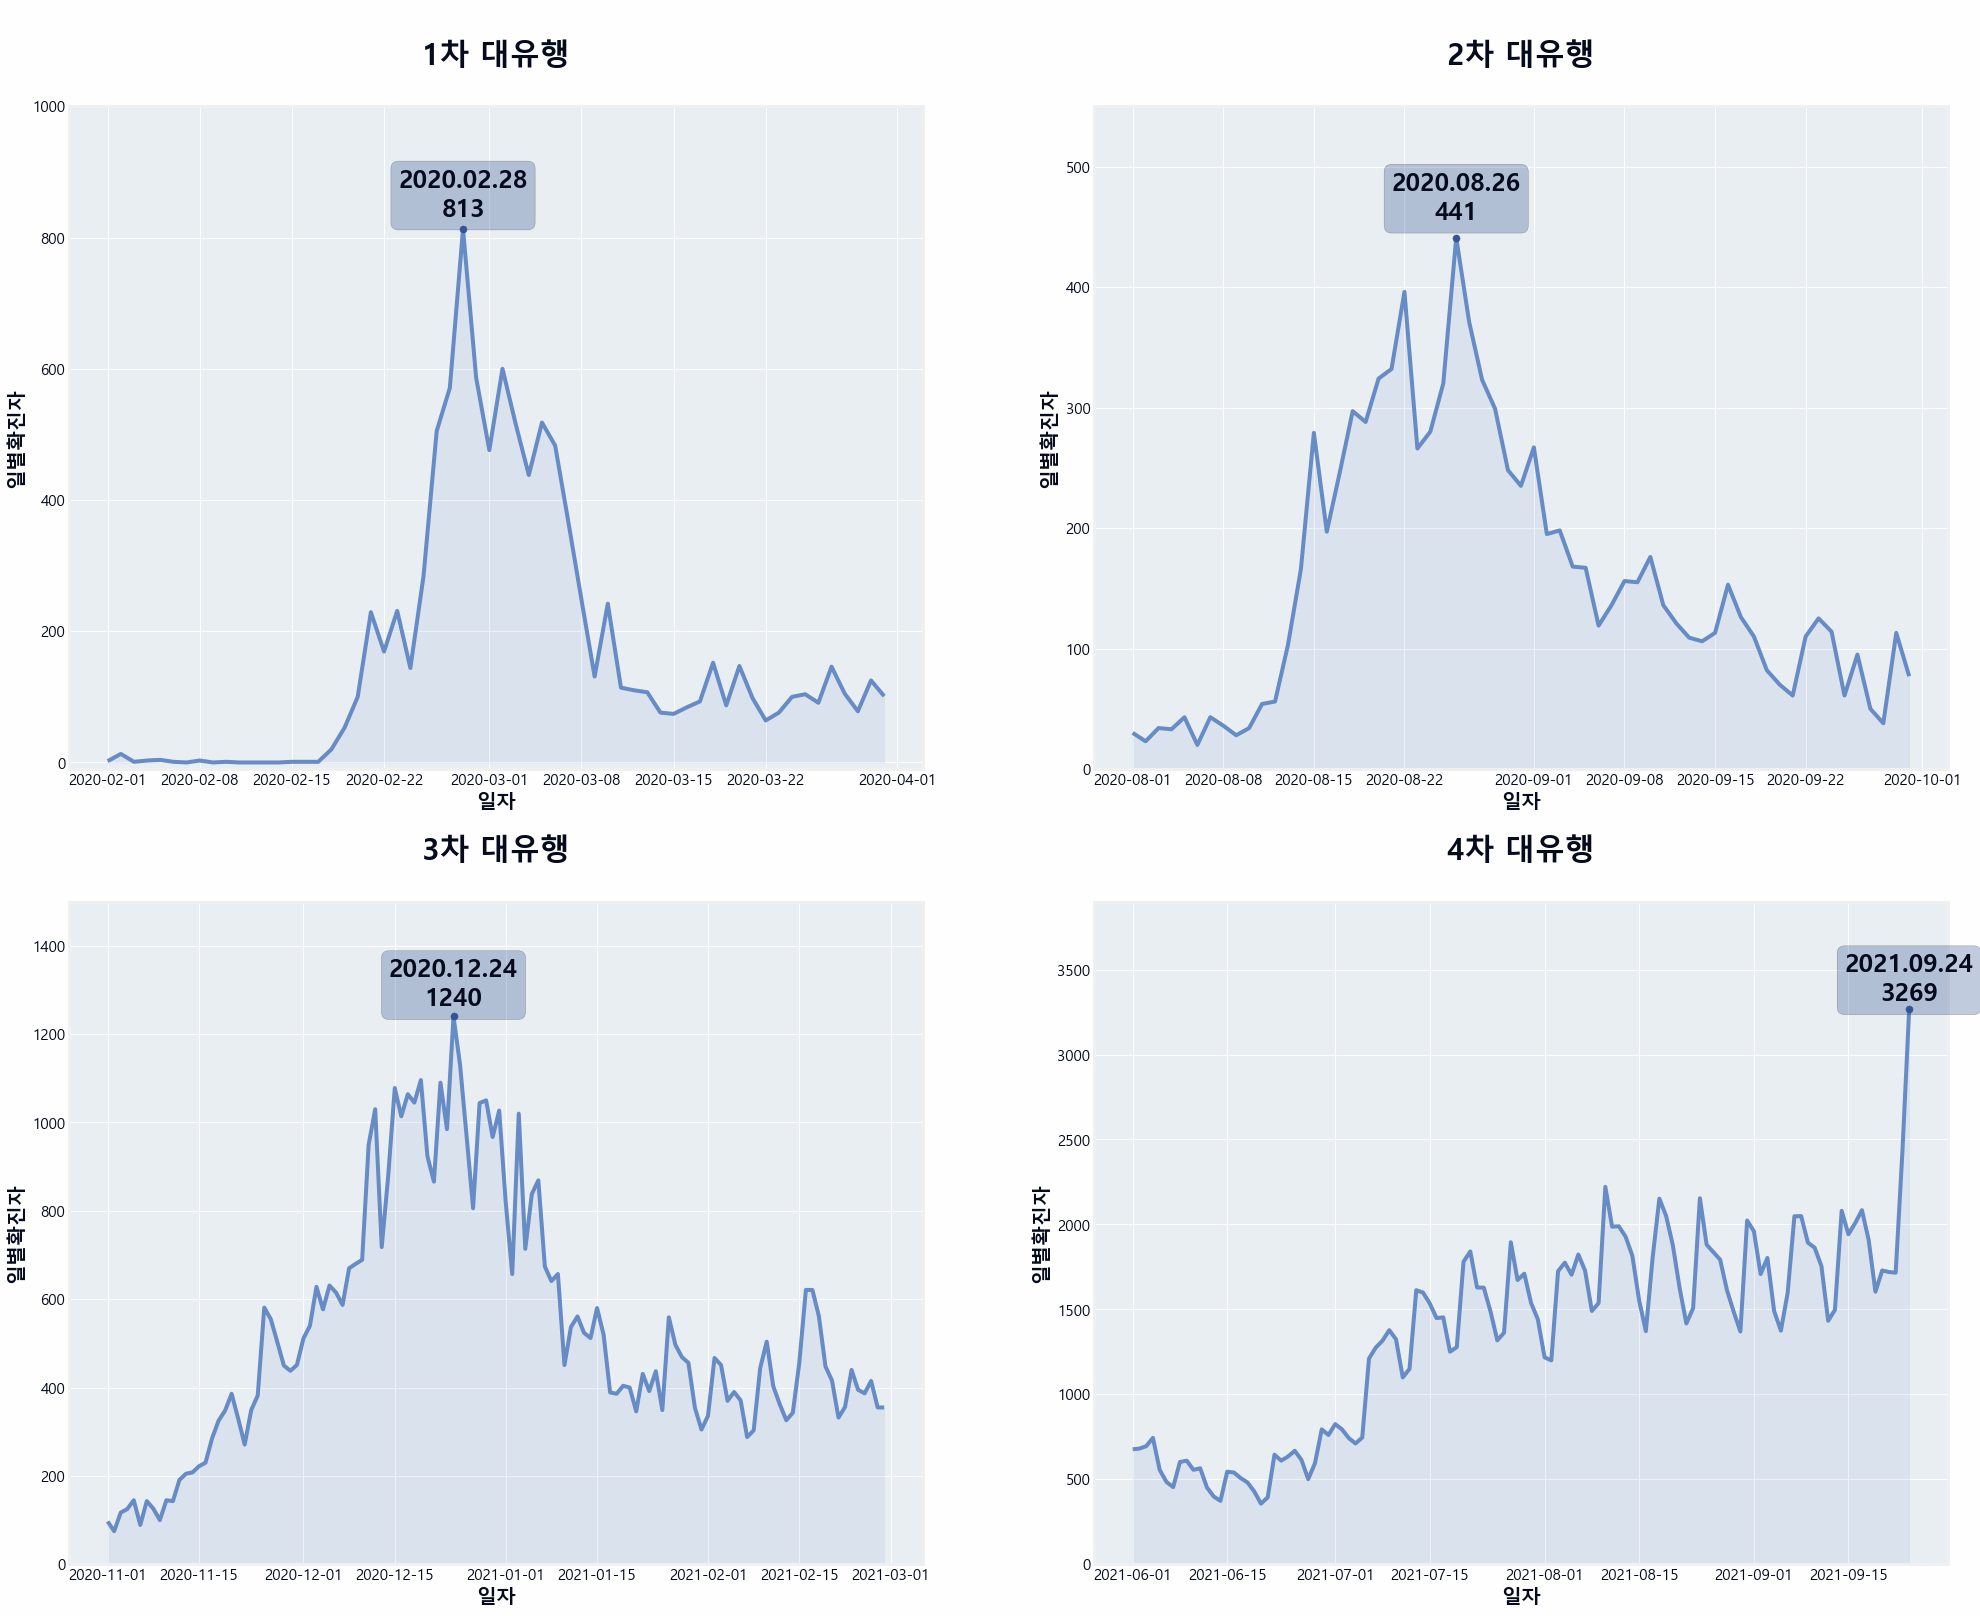

In [59]:
# ÎåÄÏú†Ìñâ Í∏∞Í∞Ñ ÌôïÏßÑÏûê Ïàò ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(30,25)

axes[0][0].set_title('\n1Ï∞® ÎåÄÏú†Ìñâ\n', weight='bold', size=30)
axes[0][1].set_title('\n2Ï∞® ÎåÄÏú†Ìñâ\n', weight='bold', size=30)
axes[1][0].set_title('\n3Ï∞® ÎåÄÏú†Ìñâ\n', weight='bold', size=30)
axes[1][1].set_title('\n4Ï∞® ÎåÄÏú†Ìñâ\n', weight='bold', size=30)
li=[[covid_data_1st_pandemic,covid_data_2nd_pandemic],[covid_data_3rd_pandemic, covid_data_4th_pandemic]]
for i in range(2):
    for j in range(2):
        axes[i][j].grid(color=ColorGrid)  # bluish dark grey, but slightly lighter than background
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].tick_params(axis='y', labelsize=15)
        axes[i][j].set_xlabel('ÏùºÏûê',fontsize=20,weight='bold')
        axes[i][j].set_ylabel('ÏùºÎ≥ÑÌôïÏßÑÏûê',fontsize=20,weight='bold')
        axes[i][j]=pointing(li[i][j].index,li[i][j].ÏùºÎ≥ÑÌôïÏßÑÏûê , [0,-1],axes[i][j],True,10,25)
axes[0][0].set_ylim([-10,1000])
axes[0][1].set_ylim([0,550])
axes[1][0].set_ylim([0,1500])
axes[1][1].set_ylim([0,3900])

fill_under(sns.lineplot(data=covid_data_1st_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[0][0],color=ColorLine1))
fill_under(sns.lineplot(data=covid_data_2nd_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[0][1],color=ColorLine1))
fill_under(sns.lineplot(data=covid_data_3rd_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[1][0],color=ColorLine1))
fill_under(sns.lineplot(data=covid_data_4th_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[1][1],color=ColorLine1))

4Ï∞®Î°ÄÏùò ÎåÄÏú†ÌñâÏù¥ ÏãúÍ∞ÅÌôîÎ°ú ÎöúÎ†∑ÌïòÍ≤å ÌëúÌòÑÎêòÎ©∞, 4Ï∞® ÎåÄÏú†ÌñâÏùÄ Ïó¨Ï†ÑÌûà ÏßÑÌñâÏ§ëÏù¥Îã§.

# Í≥†ÏÜçÎèÑÎ°ú Ïù¥Ïö© ÍµêÌÜµÎüâ Ï∂îÏù¥

In [19]:
# ÎÖÑÎèÑÎ≥Ñ/Î∂ÑÍ∏∞Î≥Ñ ÍµêÌÜµÎüâ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

traffic_2018_01=pd.read_csv('data/2018_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02Î∂ÑÍ∏∞.csv',encoding='cp949')

In [20]:
# Î∂ÑÍ∏∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú Ìï©ÏπòÍ∏∞

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])
# Î™ÖÏπ≠Ïù¥ Î∂àÍ∑úÏπôÌïòÏó¨ ÌÜµÏùº

traffic_data=traffic_data.replace('ÏÑúÏÑúÏö∏ÏòÅÏóÖÏÜå','ÏÑúÏÑúÏö∏')
traffic_data=traffic_data.replace('ÏÑúÏö∏ÏòÅÏóÖÏÜå','ÏÑúÏö∏')
traffic_data=traffic_data.replace('ÏÑúÎåÄÍµ¨ÏòÅÏóÖÏÜå','ÏÑúÎåÄÍµ¨')
traffic_data=traffic_data.replace('Î∂ÅÎåÄÍµ¨ÏòÅÏóÖÏÜå','Î∂ÅÎåÄÍµ¨')
traffic_data=traffic_data.replace('ÎÇ®ÎåÄÍµ¨ÏòÅÏóÖÏÜå','ÎÇ®ÎåÄÍµ¨')
traffic_data=traffic_data.replace('Î∂ÅÍ∞ïÎ¶âÏòÅÏóÖÏÜå','Î∂ÅÍ∞ïÎ¶â')
traffic_data=traffic_data.replace('ÎÇ®Í∞ïÎ¶âÏòÅÏóÖÏÜå','ÎÇ®Í∞ïÎ¶â')
traffic_data=traffic_data.replace('Í∞ïÎ¶âÏòÅÏóÖÏÜå','Í∞ïÎ¶â')

In [21]:
def day_of_week(traffic_data): #ÏöîÏùº Ï∂îÍ∞Ä Ìï®Ïàò
    traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
    traffic_data['ÎÖÑÎèÑ']=traffic_data.index.year 
    traffic_data['Ïõî']=traffic_data.index.month
    days={0:'ÏõîÏöîÏùº',1:'ÌôîÏöîÏùº',2:'ÏàòÏöîÏùº',3:'Î™©ÏöîÏùº',4:'Í∏àÏöîÏùº',5:'ÌÜ†ÏöîÏùº',6:'ÏùºÏöîÏùº'}
    traffic_data['ÏöîÏùº']=traffic_data.index.dayofweek 
    traffic_data.ÏöîÏùº=traffic_data.ÏöîÏùº.apply(lambda x : days[x])
    return traffic_data

In [22]:
# ÌïÑÏöî ÏπºÎüºÎßå Ï∂îÏ∂ú
# Ï†ïÏàòÌòï ÏßëÍ≥ÑÏùºÏûêÎ•º DatetimeÌòï ÏßëÍ≥ÑÏùºÏûêÎ°ú Î≥ÄÌôò ÌõÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
# ÏùºÎ≥Ñ ÎÖÑÎèÑ/Ïõî/ÏöîÏùº ÏπºÎüº Ï∂îÍ∞Ä

traffic_data.index=traffic_data.ÏßëÍ≥ÑÏùºÏûê
traffic_data=traffic_data.drop('ÏßëÍ≥ÑÏùºÏûê',axis=1)
traffic_data=traffic_data[['ÏòÅÏóÖÏÜåÎ™Ö','1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ']]
traffic_data=day_of_week(traffic_data)
traffic_data.head()

ÏòÅÏóÖÏÜåÎ™Ö  1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ  Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî  \
ÏßëÍ≥ÑÏùºÏûê                                                                         
2018-01-01     Í∞ÄÎùΩ    211      6      6     21     27      4   275  2018  1   
2018-01-01     Í∞ÄÎùΩ    615     14      5     14     96     26   770  2018  1   
2018-01-01  Í∞ÄÎùΩ(Í∞ú)   2358     31     48     57    131    273  2898  2018  1   
2018-01-01  Í∞ÄÎùΩ(Í∞ú)   7148     27     71     27    267    378  7918  2018  1   
2018-01-01  Í∞ÄÎùΩ(Í∞ú)   2946     29     52     48    150    357  3582  2018  1   

             ÏöîÏùº  
ÏßëÍ≥ÑÏùºÏûê             
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº

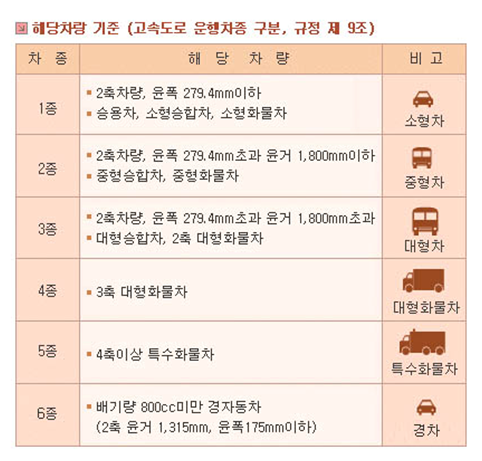

## Ï†ÑÍµ≠ ÍµêÌÜµÎüâ Î∂ÑÏÑù

In [23]:
# Î™®Îì† Í≥≥Ïùò ÌÜ®Í≤åÏù¥Ìä∏Ïóê ÎåÄÌïú ÍµêÌÜµÎüâ Ìï©ÏÇ∞

traffic_data_total=traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()
traffic_data_total=day_of_week(traffic_data_total)
# ÎÖÑÎèÑÎ≥Ñ Ï†ÄÏû•

traffic_data_2018=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2018]
traffic_data_2019=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2019]
traffic_data_2020=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2020]
traffic_data_2021=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2021]

# ÏΩîÎ°úÎÇò Í∏∞Í∞Ñ Ï†ÄÏû•

traffic_data_2020_2021=traffic_data_total[(traffic_data_total.ÎÖÑÎèÑ==2020)|(traffic_data_total.ÎÖÑÎèÑ==2021)]
traffic_data_total.head()

1Ï¢ÖÍµêÌÜµÎüâ   2Ï¢ÖÍµêÌÜµÎüâ   3Ï¢ÖÍµêÌÜµÎüâ   4Ï¢ÖÍµêÌÜµÎüâ   5Ï¢ÖÍµêÌÜµÎüâ   6Ï¢ÖÍµêÌÜµÎüâ     Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî  \
ÏßëÍ≥ÑÏùºÏûê                                                                            
2018-01-01  5562671   64729  140284   36796   34705  240045  6079230  2018  1   
2018-01-02  4945308  200328  257620  163881  234282  290196  6091615  2018  1   
2018-01-03  4841053  232174  293244  212214  294425  289377  6162487  2018  1   
2018-01-04  4902656  232305  293413  209227  300632  291083  6229316  2018  1   
2018-01-05  5342859  233726  299322  209493  299666  310678  6695744  2018  1   

             ÏöîÏùº  
ÏßëÍ≥ÑÏùºÏûê             
2018-01-01  ÏõîÏöîÏùº  
2018-01-02  ÌôîÏöîÏùº  
2018-01-03  ÏàòÏöîÏùº  
2018-01-04  Î™©ÏöîÏùº  
2018-01-05  Í∏àÏöîÏùº

Text(0.5, 0.98, '\nÏöîÏùºÎ≥Ñ ÍµêÌÜµÎüâ\n')

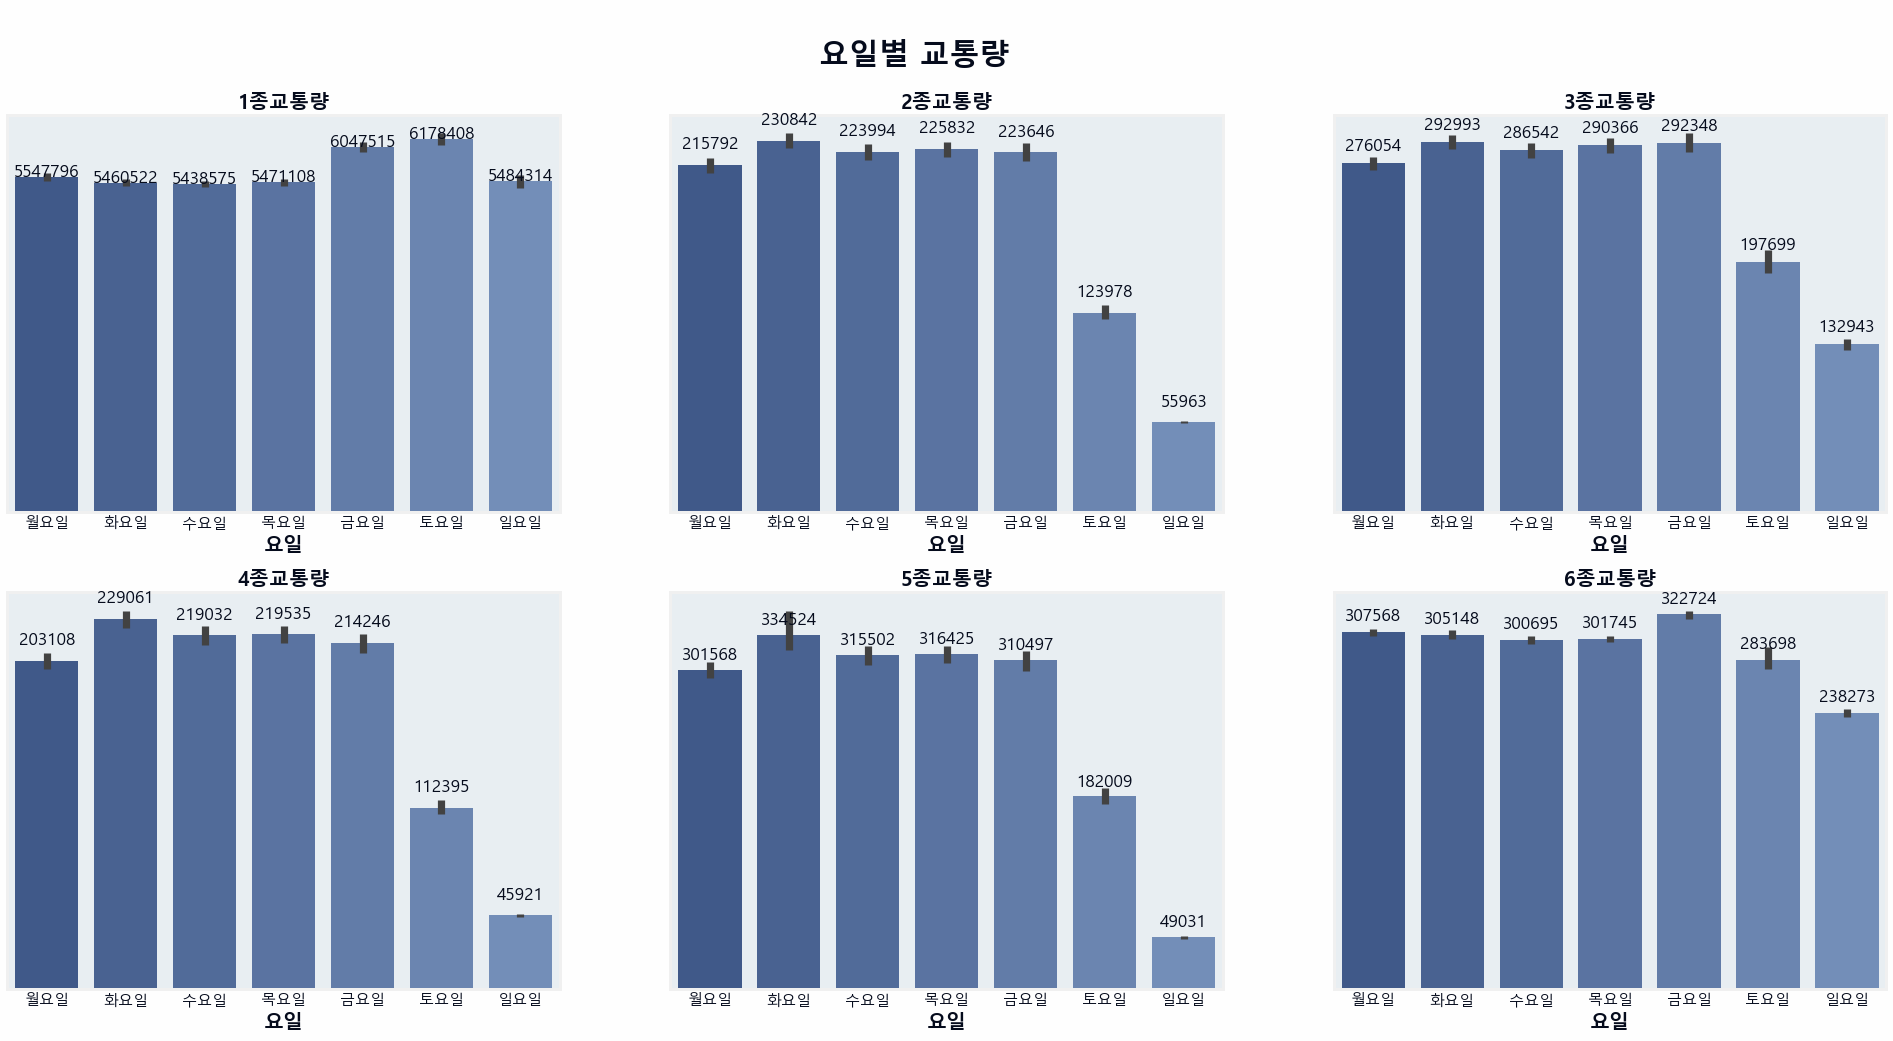

In [60]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
# lim ÏÑ§Ï†ïÌïòÎ©¥ ÏïàÎ≥¥Ïó¨ „Ö†
traffic=[['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ'],['4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ']]
fig, axes=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(30,15)
colors = ['#345595','#3D5E9D','#4567A5','#4E70AD','#5679B4','#5F82BC','#678BC4']

for i in range(2):
    for j in range(3):
        #axes[i][j].set_ylim([0,9000000])
        axes[i][j].grid(color=ColorGrid) 
        axes[i][j].get_yaxis().get_major_formatter().set_scientific(False)
        axes[i][j].set_title(traffic[i][j], weight='bold')
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].yaxis.set_major_locator(plt.NullLocator())
        axes[i][j].get_yaxis().set_visible(False)
        axes[i][j].set_xlabel('ÏöîÏùº',fontsize=20,weight='bold')
        sns.barplot(x='ÏöîÏùº', y=traffic[i][j], data=traffic_data_total,ax=axes[i][j],palette=colors)
        show_values_on_bars(axes[i][j],17)
        
plt.suptitle('\nÏöîÏùºÎ≥Ñ ÍµêÌÜµÎüâ\n',weight='bold', fontsize=30)

ÏöîÏùºÎ≥Ñ ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏Ìï¥Î≥∏ Í≤∞Í≥º, 1Ï¢Ö ÍµêÌÜµÏùò ÍµêÌÜµÎüâÏùÄ ÏöîÏùºÍ≥º Í¥ÄÍ≥ÑÏóÜÏù¥ Í±∞Ïùò ÎπÑÏä∑ÌïòÎã§.
2Ï¢ÖÎ∂ÄÌÑ∞ 6Ï¢ÖÍπåÏßÄÏùò ÍµêÌÜµÎüâÏùÄ Ï£ºÎßêÏù¥ Ï†ÅÏúºÎ©∞, ÌèâÏùºÏù¥ ÎßéÎã§.
Ïù¥Îäî Í∑ºÎ¨¥Î•º ÏúÑÌï¥ ÏõÄÏßÅÏù¥Îäî ÏÇ¨ÎûåÎì§Ïùò ÍµêÌÜµÎüâÏóê ÏùòÌï¥ÏÑú ÎßéÎã§Í≥† ÏÉùÍ∞ÅÎêòÏñ¥ÏßÄÎ©∞,
Í∞úÏù∏Ï†ÅÏù∏ ÏùºÎ°ú ÏõÄÏßÅÏù¥Îäî ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï£ºÎßêÏùò ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§Í≥† ÏÉùÍ∞ÅÎêúÎã§.
ÎòêÌïú, 1Ï¢Ö ÍµêÌÜµÎüâ ÌòπÏùÄ Ï¥ù ÍµêÌÜµÎüâÎ≥¥Îã§Îäî ÎÇòÎ®∏ÏßÄ ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏Ìï¥Î≥¥Îäî Í≤ÉÏù¥ ÎöúÎ†∑Ìïú Î≥ÄÌôîÎ•º ÌôïÏù∏Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.

Text(0.5, 0.98, '\nÏ∞®Ï¢ÖÎ≥Ñ ÍµêÌÜµÎüâ\n')

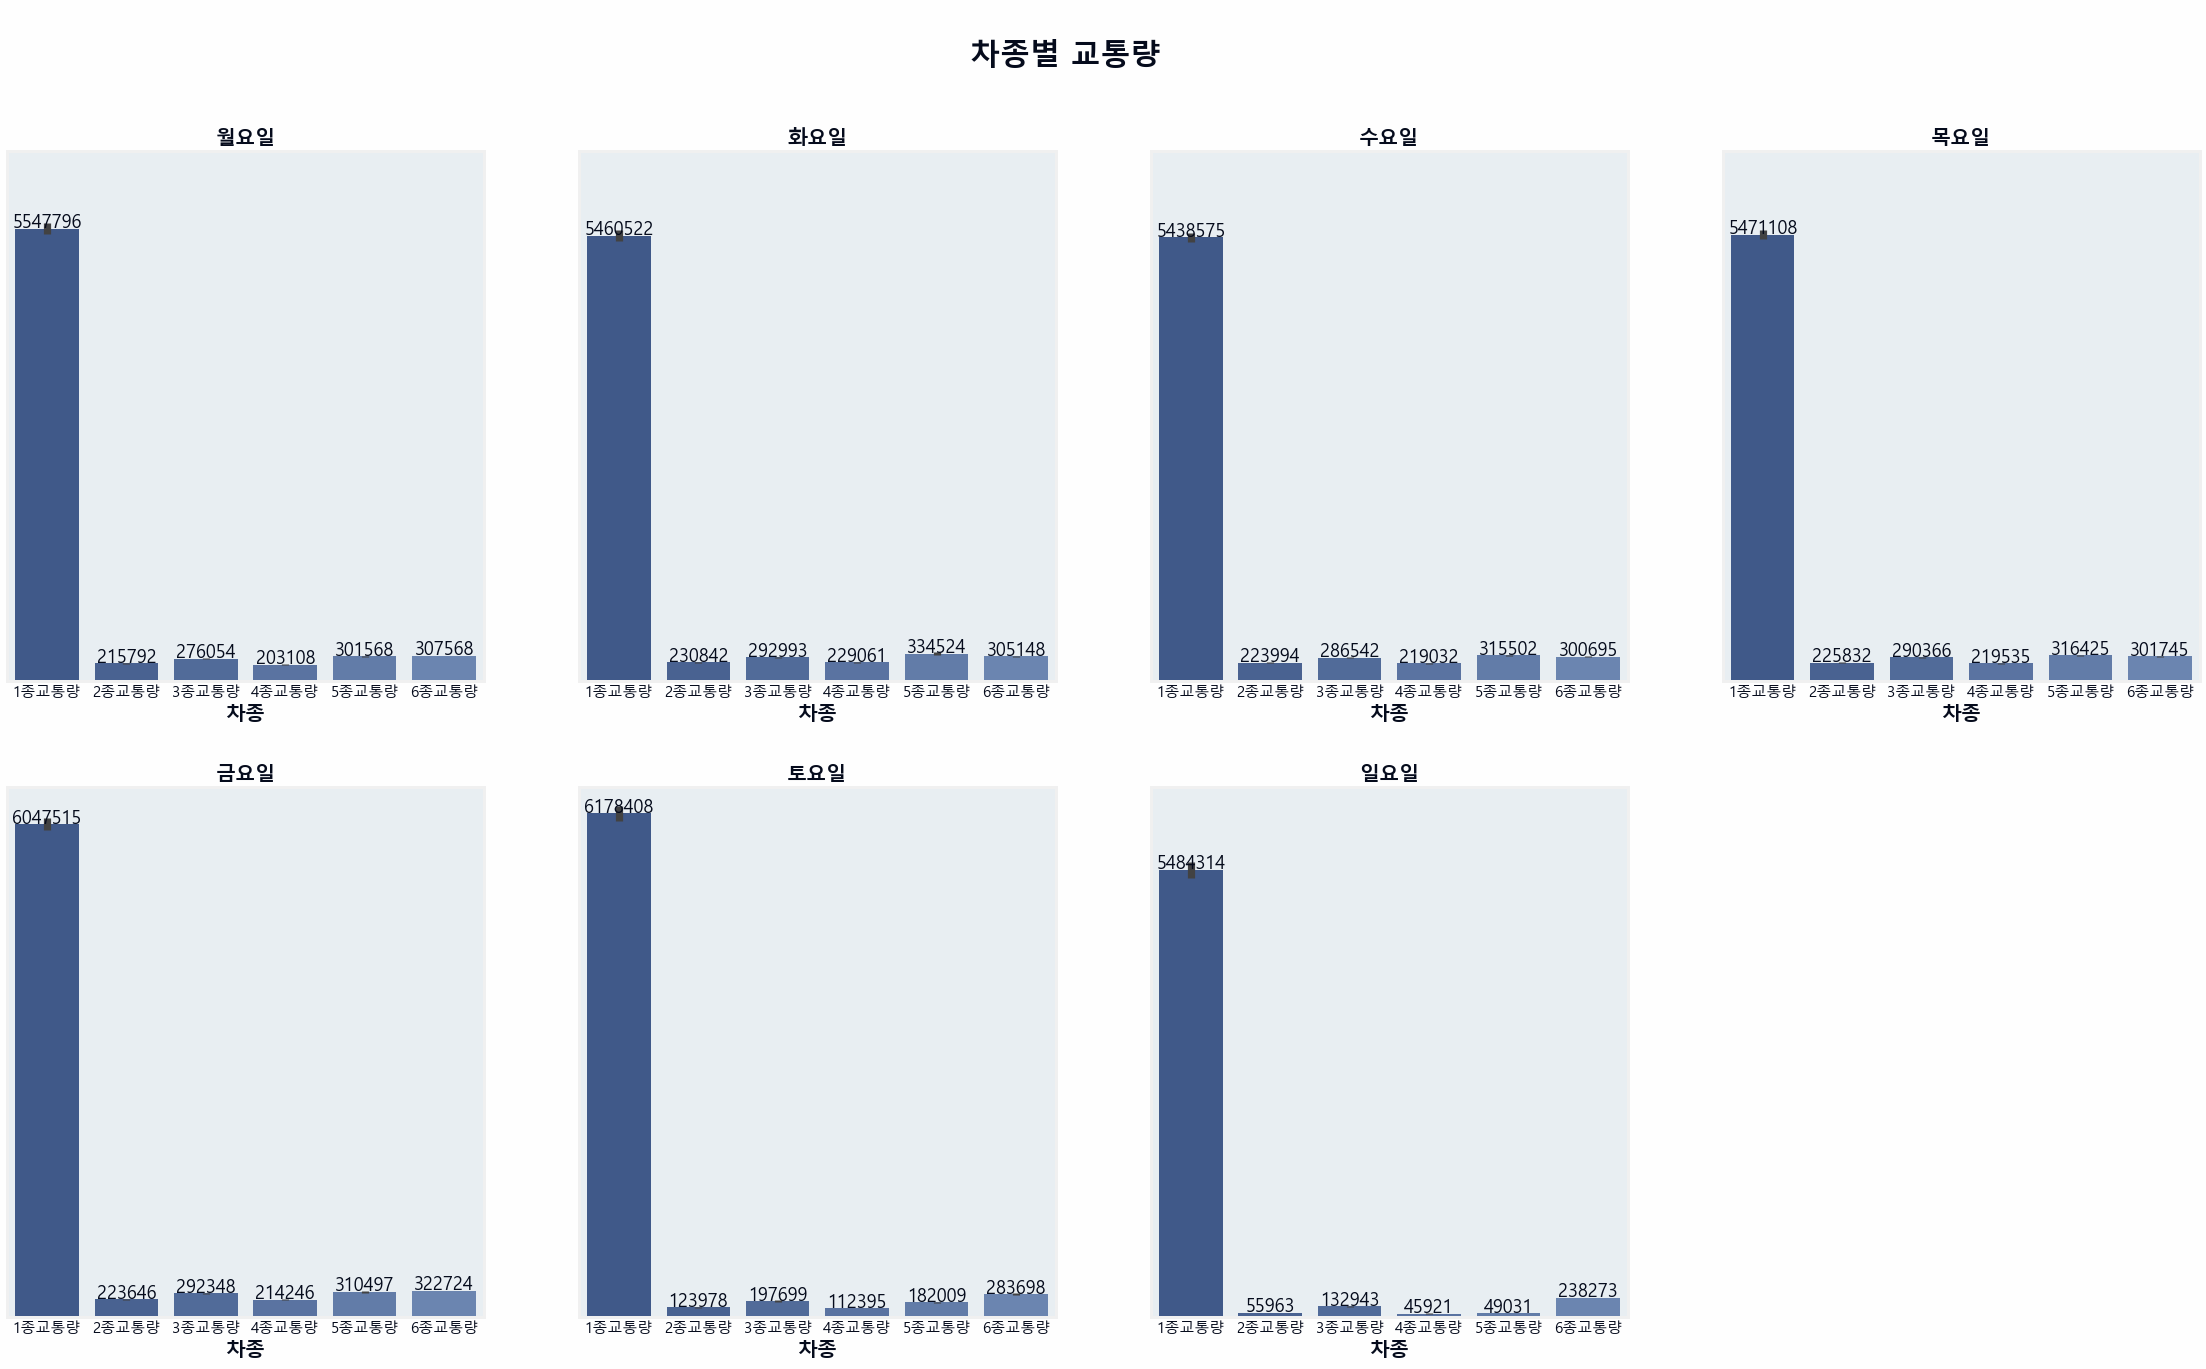

In [61]:
# Ï∞®Ï¢ÖÎ≥Ñ ÏöîÏùº ÍµêÌÜµÎüâ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
# lim ÏÑ§Ï†ïÌïòÎ©¥ ÏïàÎ≥¥Ïó¨ „Ö†
traffic=[['ÏõîÏöîÏùº','ÌôîÏöîÏùº','ÏàòÏöîÏùº','Î™©ÏöîÏùº'],['Í∏àÏöîÏùº','ÌÜ†ÏöîÏùº','ÏùºÏöîÏùº',None]]
fig, axes=plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(35,20)

for i in range(2):
    for j in range(4):
        if i==1 and j==3: break
        axes[i][j].grid(color=ColorGrid) 
        axes[i][j].set_ylim([0,6500000])
        axes[i][j].get_yaxis().get_major_formatter().set_scientific(False)
        melted=traffic_data_total[traffic_data_total['ÏöîÏùº']==traffic[i][j]]
        melted=melted.drop(['ÎÖÑÎèÑ','Ïõî','ÏöîÏùº','Ï¥ùÍµêÌÜµÎüâ'],axis=1)
        melted=pd.melt(melted)
        melted.columns=['Ï∞®Ï¢Ö','ÍµêÌÜµÎüâ']
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].tick_params(axis='y', labelsize=15)
        axes[i][j].set_xlabel('Ï∞®Ï¢Ö',fontsize=20,weight='bold')
        axes[i][j].set_ylabel('ÍµêÌÜµÎüâ',fontsize=20,weight='bold')
        axes[i][j].set_title(traffic[i][j], weight='bold')
        axes[i][j].yaxis.set_major_locator(plt.NullLocator())
        axes[i][j].get_yaxis().set_visible(False)
        sns.barplot(x='Ï∞®Ï¢Ö',y='ÍµêÌÜµÎüâ',data=melted,ax=axes[i][j],palette=colors)
        show_values_on_bars(axes[i][j],18)
axes[1][3].remove()

plt.suptitle('\nÏ∞®Ï¢ÖÎ≥Ñ ÍµêÌÜµÎüâ\n',weight='bold', fontsize=30)

### Ï†ÑÍµ≠ ÍµêÌÜµÎüâ Ï∂îÏù¥ ÌôïÏù∏ - 1Ï¢Ö ÍµêÌÜµÎüâ

<AxesSubplot:title={'center':'\nÏ†ÑÍµ≠ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

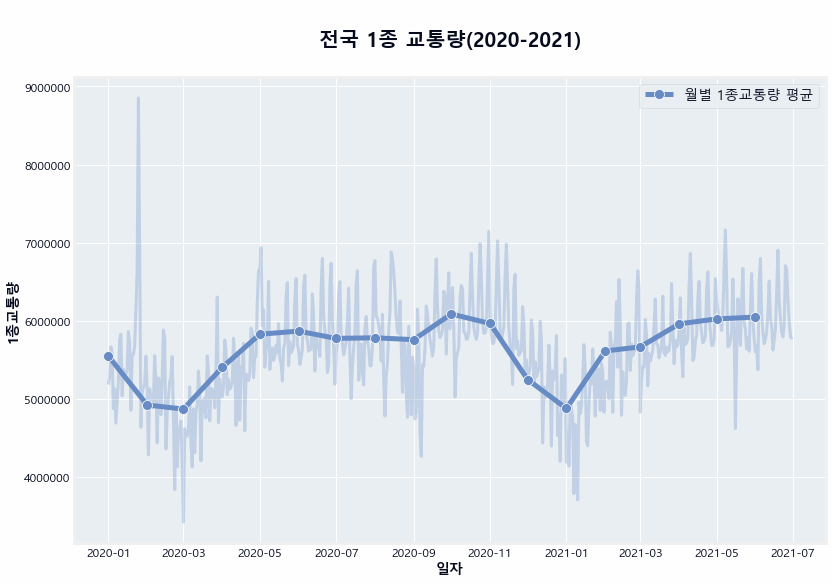

In [26]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûêÍ∞ÄÏö©) Î∂ÑÏÑù 

data=pd.DataFrame(traffic_data_total[((traffic_data_total.ÎÖÑÎèÑ==2020)|(traffic_data_total.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['1Ï¢ÖÍµêÌÜµÎüâ'].mean())
time=[]
for i in range(len(data.index)):
    time.append(str(data.index[i][0])+'-'+str(data.index[i][1])+'-1')
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')


plt.figure(figsize=(12,8)) 
plt.grid(color=ColorGrid) 
plt.title('\nÏ†ÑÍµ≠ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold')
plt.margins(x=0.05,y=0.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ÏùºÏûê',fontdict={'weight': 'bold', 'size': 14})
plt.ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontdict={'weight': 'bold', 'size': 14})

ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

sns.lineplot(data=traffic_data_total[((traffic_data_total.ÎÖÑÎèÑ==2020)|(traffic_data_total.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1, alpha=0.3, linewidth='3')
sns.lineplot(data=data, x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1,linewidth='5',marker='o',markersize=10,label='ÏõîÎ≥Ñ 1Ï¢ÖÍµêÌÜµÎüâ ÌèâÍ∑†')

390


<AxesSubplot:title={'center':'\nÏ†ÑÍµ≠ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

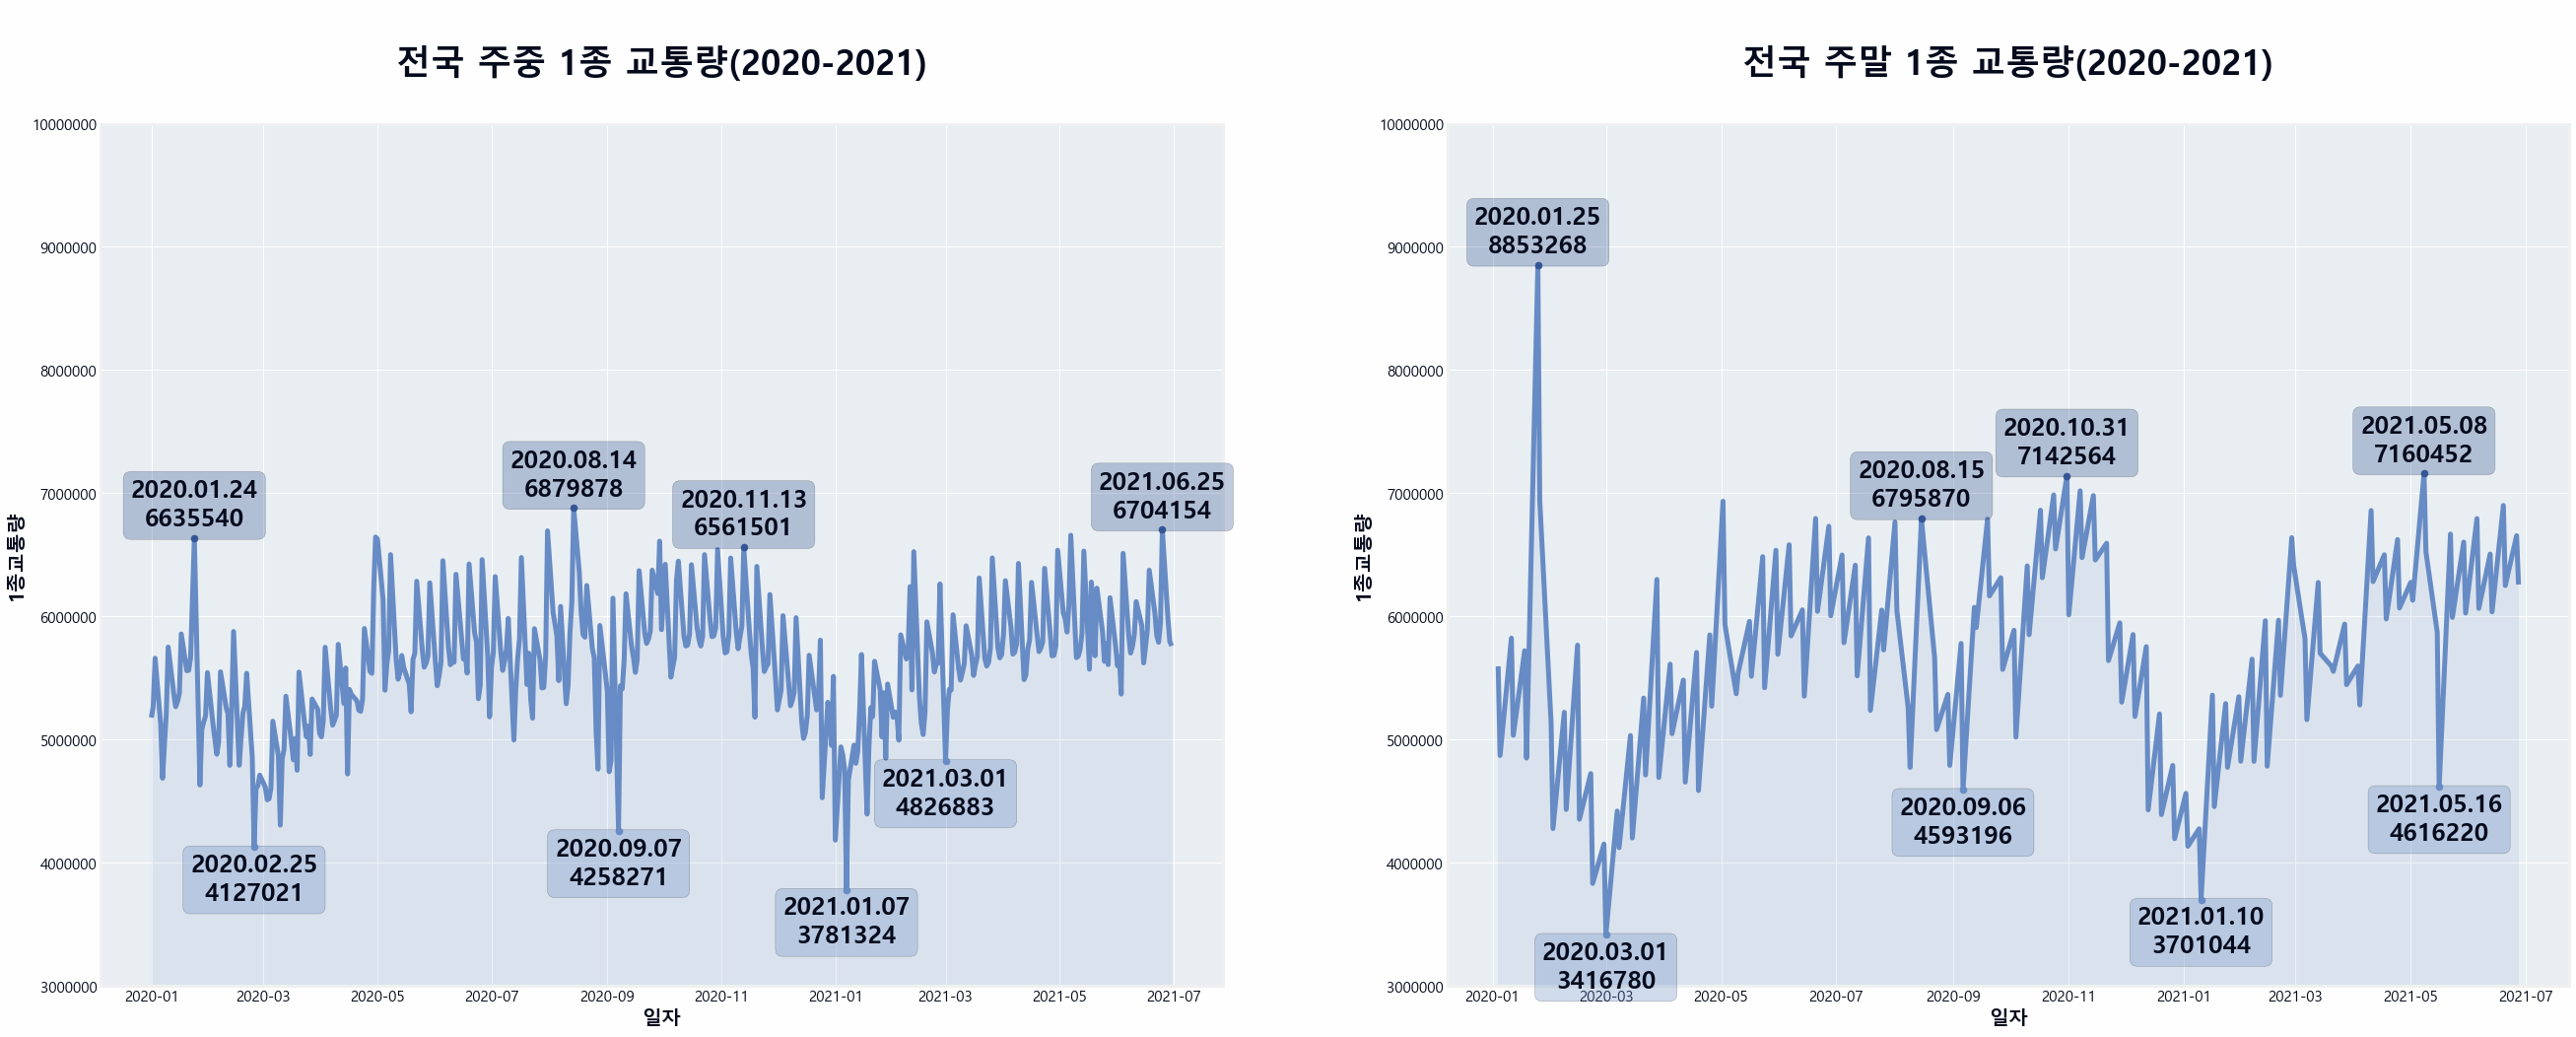

In [27]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
traffic_weekd=traffic_data_2020_2021[((traffic_data_total.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(traffic_data_total.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(traffic_data_total.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(traffic_data_total.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(traffic_data_total.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((traffic_data_total.ÎÖÑÎèÑ==2020)|(traffic_data_total.ÎÖÑÎèÑ==2021))]
traffic_weeke=traffic_data_2020_2021[((traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')
                                    |(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº'))
                                    &((traffic_data_total.ÎÖÑÎèÑ==2020)|(traffic_data_total.ÎÖÑÎèÑ==2021))]
x1=traffic_weekd.index
y1=traffic_weekd['1Ï¢ÖÍµêÌÜµÎüâ']

x2=traffic_weeke.index
y2=traffic_weeke['1Ï¢ÖÍµêÌÜµÎüâ']
x=[x1, x2]
y=[y1, y2]
print(len(x1))
for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([3000000,10000000])
    axes[i].grid(color=ColorGrid) 
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=20,weight='bold')
    axes[i].set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=20,weight='bold')


    li=q(len(x[i]))
    axes[i]=pointing(x[i],y[i],[li[0],li[1]-20],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[li[0],li[1]-20],axes[i],False,50000,25)
    
    axes[i]=pointing(x[i],y[i],[li[2],li[3]],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[li[2],li[3]],axes[i],False,50000,25)
    
    axes[i]=pointing(x[i],y[i],[li[4],li[5]],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[li[4],li[5]],axes[i],False,50000,25)
    
    axes[i]=pointing(x[i],y[i],[li[6],li[7]],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[li[6],li[7]],axes[i],False,50000,25)
axes[0].set_title('\nÏ†ÑÍµ≠ Ï£ºÏ§ë 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold', size=35)
axes[1].set_title('\nÏ†ÑÍµ≠ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold', size=35)

fill_under(sns.lineplot(data=traffic_weekd ,x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],linewidth='5',color=ColorLine1))
fill_under(sns.lineplot(data=traffic_weeke, x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],linewidth='5',color=ColorLine1))

<AxesSubplot:title={'center':'\nÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

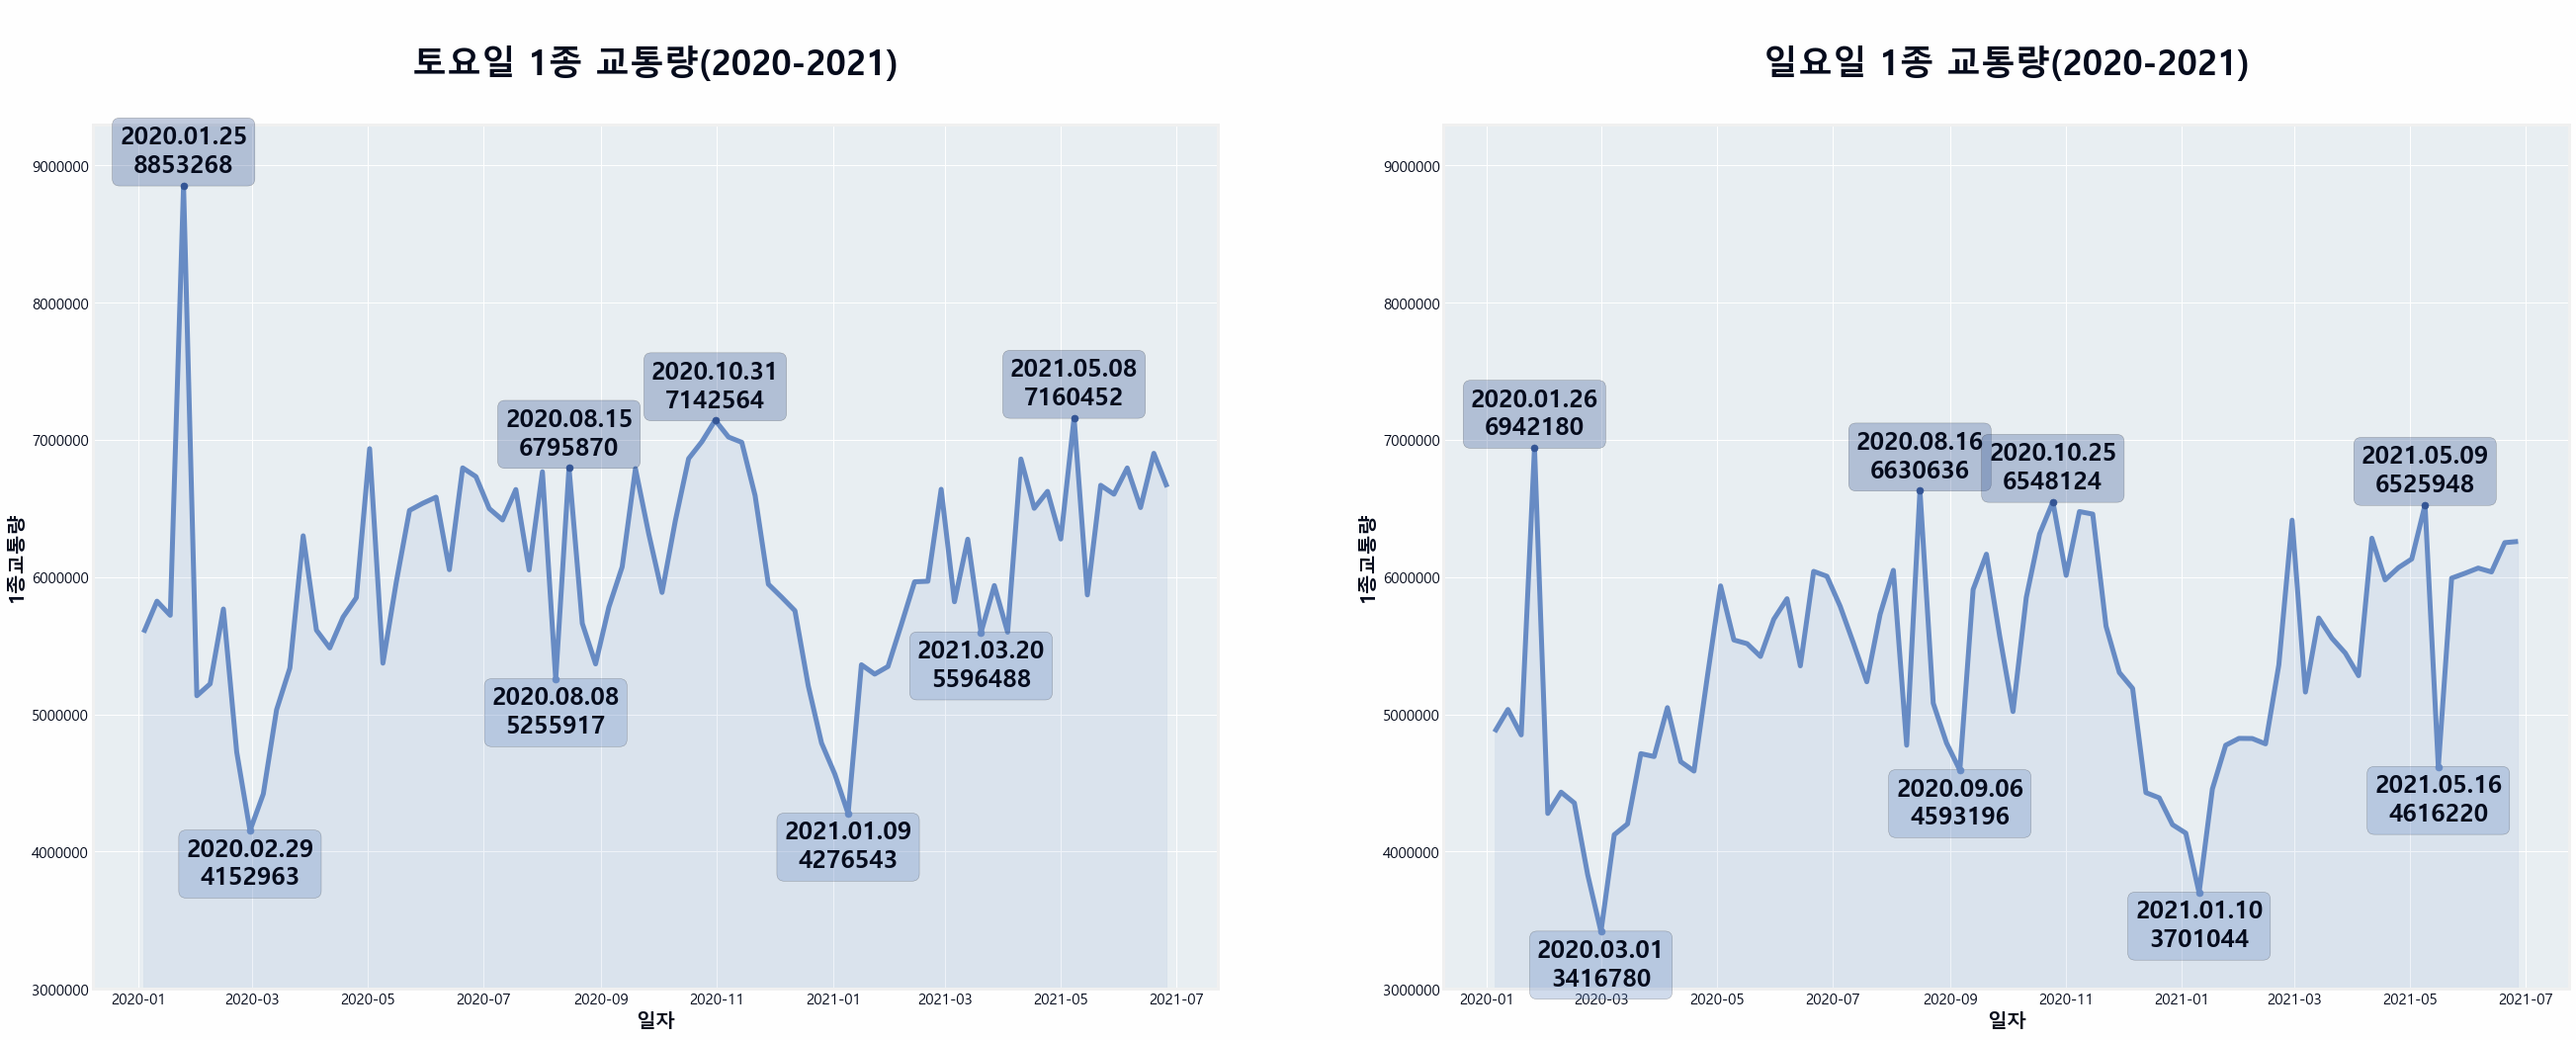

In [28]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)

x1=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')].index
y1=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')]['1Ï¢ÖÍµêÌÜµÎüâ']

x2=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')].index
y2=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')]['1Ï¢ÖÍµêÌÜµÎüâ']
x=[x1, x2]
y=[y1, y2]

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([3000000,9300000])
    axes[i].grid(color=ColorGrid) 
    
    axes[i]=pointing(x[i],y[i],[0,20],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[0,20],axes[i],False,50000,25)
    
    axes[i]=pointing(x[i],y[i],[20,40],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[20,40],axes[i],False,50000,25)
    
    axes[i]=pointing(x[i],y[i],[40,60],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[40,60],axes[i],False,50000,25)
    
    axes[i]=pointing(x[i],y[i],[60,78],axes[i],True,50000,25)
    axes[i]=pointing(x[i],y[i],[60,78],axes[i],False,50000,25)
    
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=20,weight='bold')
    axes[i].set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=20,weight='bold')

    
axes[0].set_title('\nÌÜ†ÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold', size=35)
axes[1].set_title('\nÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold', size=35)

fill_under(sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],linewidth='5',color=ColorLine1))
fill_under(sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],linewidth='5',color=ColorLine1))


### Ï†ÑÍµ≠ ÍµêÌÜµÎüâ Ï∂îÏù¥ ÌôïÏù∏ - 2Ï¢Ö ÍµêÌÜµÎüâ

<AxesSubplot:title={'center':'\n<ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏùºÏûê', ylabel='2Ï¢ÖÍµêÌÜµÎüâ'>

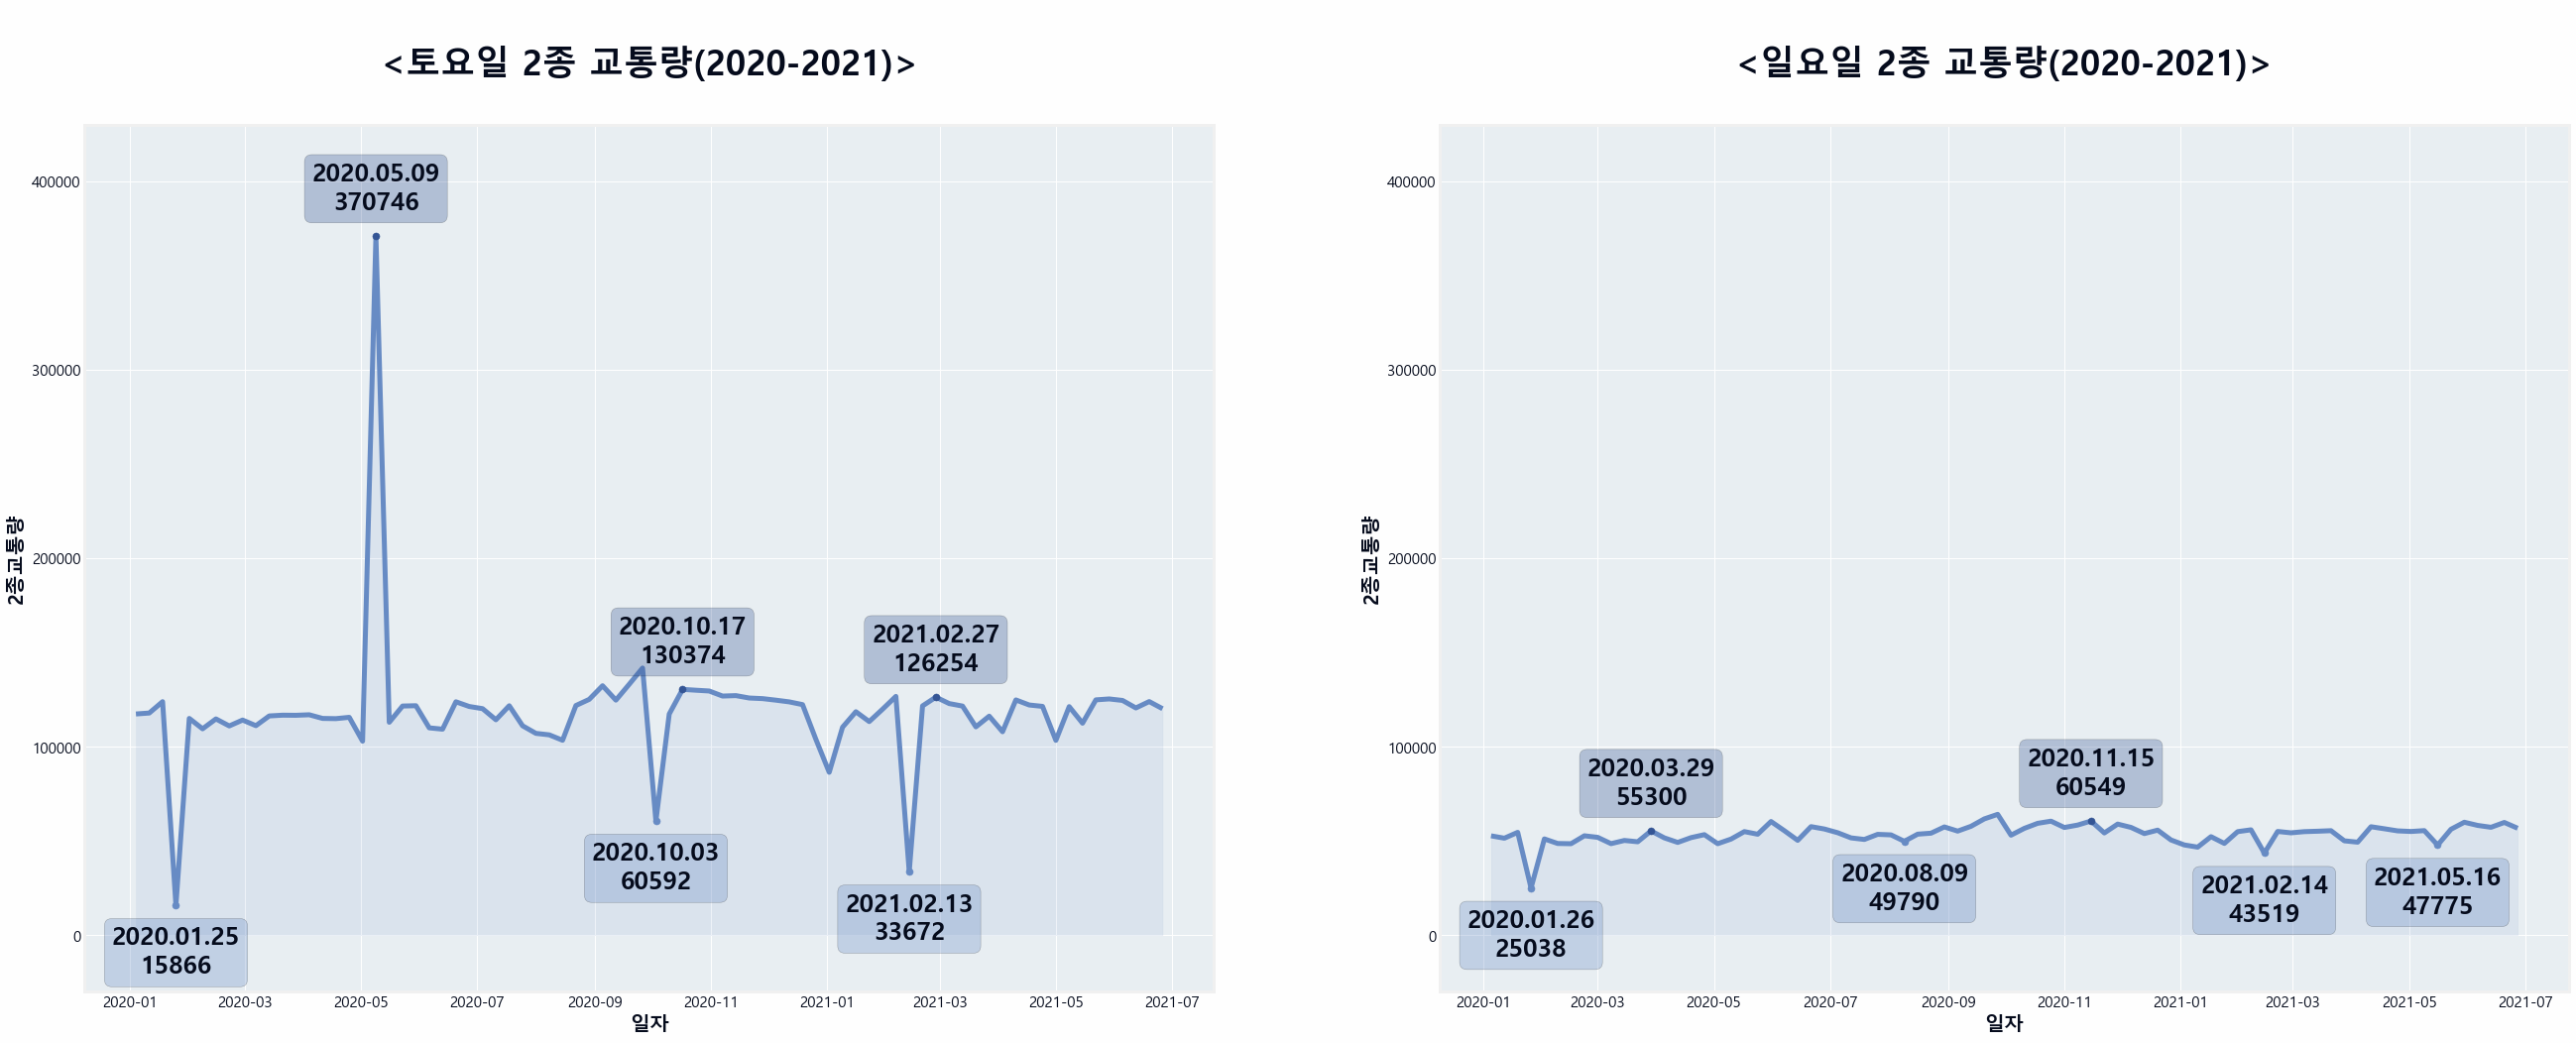

In [29]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)

x1=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')].index
y1=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')]['2Ï¢ÖÍµêÌÜµÎüâ']

x2=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')].index
y2=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')]['2Ï¢ÖÍµêÌÜµÎüâ']
x=[x1, x2]
y=[y1, y2]

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([-30000,430000])
    axes[i].grid(color=ColorGrid) 
    
    axes[i]=pointing(x[i],y[i],[0,20],axes[i],True,11000,25)
    axes[i]=pointing(x[i],y[i],[0,20],axes[i],False,11000,25)
    
    axes[i]=pointing(x[i],y[i],[20,40],axes[i],False,11000,25)
    
    axes[i]=pointing(x[i],y[i],[40,60],axes[i],True,11000,25)
    axes[i]=pointing(x[i],y[i],[40,60],axes[i],False,11000,25)
    
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=20,weight='bold')
    axes[i].set_ylabel('2Ï¢ÖÍµêÌÜµÎüâ',fontsize=20,weight='bold')
    
axes[0]=pointing(x[0],y[0],[60,78],axes[0],True,11000,25)
axes[1]=pointing(x[1],y[1],[60,78],axes[1],False,11000,25)
    
axes[0].set_title('\n<ÌÜ†ÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n', size=35, weight='bold')
axes[1].set_title('\n<ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n', size=35, weight='bold')

fill_under(sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],linewidth='5',color=ColorLine1))
fill_under(sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],linewidth='5',color=ColorLine1))

## ÏÑúÏö∏ ÍµêÌÜµÎüâ Î∂ÑÏÑù

In [30]:
seoul_traffic_data=traffic_data[(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÏÑúÏÑúÏö∏')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÎèôÏÑúÏö∏')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÏÑúÏö∏')]
seoul_traffic_data=seoul_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()
seoul_traffic_data=day_of_week(seoul_traffic_data)
#[ÏÑúÏö∏]1Ï¢ÖÍµêÌÜµÎüâ, 2Ï¢ÖÍµêÌÜµÎüâ ÏµúÏÜå ÏµúÎåÄÍ∞í Íµ¨ÌïòÍ∏∞

seoul_min_first=min(seoul_traffic_data['1Ï¢ÖÍµêÌÜµÎüâ'])
seoul_max_first=max(seoul_traffic_data['1Ï¢ÖÍµêÌÜµÎüâ'])

seoul_min_second=min(seoul_traffic_data['2Ï¢ÖÍµêÌÜµÎüâ'])
seoul_max_second=max(seoul_traffic_data['2Ï¢ÖÍµêÌÜµÎüâ'])

seoul_traffic_data.head()

1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ    Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî   ÏöîÏùº
ÏßëÍ≥ÑÏùºÏûê                                                                       
2018-01-01  422993   5819  20619   2523   1392  18046  471392  2018  1  ÏõîÏöîÏùº
2018-01-02  412943  17056  29178  11928   9202  22481  502788  2018  1  ÌôîÏöîÏùº
2018-01-03  395108  20067  32127  16606  11753  22022  497683  2018  1  ÏàòÏöîÏùº
2018-01-04  402322  19891  32029  16087  11928  22179  504436  2018  1  Î™©ÏöîÏùº
2018-01-05  435052  19531  33259  15420  11579  23623  538464  2018  1  Í∏àÏöîÏùº

### ÏÑúÏö∏ 1Ï¢Ö ÍµêÌÜµÎüâ

<AxesSubplot:title={'center':'\nÏÑúÏö∏ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

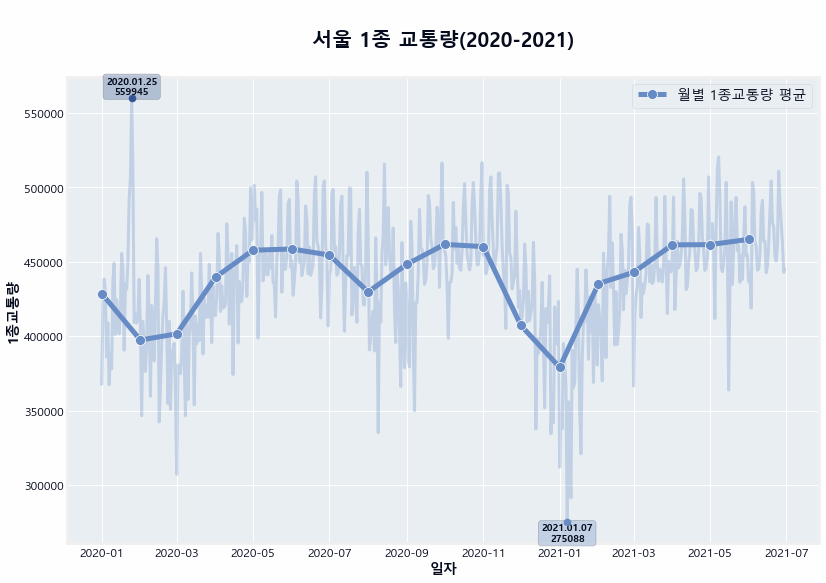

In [31]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûêÍ∞ÄÏö©) Î∂ÑÏÑù 

data=pd.DataFrame(seoul_traffic_data[((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['1Ï¢ÖÍµêÌÜµÎüâ'].mean())
time=[]
for i in range(len(data.index)):
    time.append(str(data.index[i][0])+'-'+str(data.index[i][1])+'-1')
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')


plt.figure(figsize=(12,8)) 

plt.grid(color=ColorGrid) 
plt.title('\nÏÑúÏö∏ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold')
plt.margins(x=0.05,y=0.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ÏùºÏûê',fontdict={'weight': 'bold', 'size': 14})
plt.ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontdict={'weight': 'bold', 'size': 14})
ax=plt.gca()
ax=pointing(seoul_traffic_data[(seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021)].index,seoul_traffic_data[(seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021)]['1Ï¢ÖÍµêÌÜµÎüâ'],[0,78],ax,True,1000,10)
ax=pointing(seoul_traffic_data[(seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021)].index,seoul_traffic_data[(seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021)]['1Ï¢ÖÍµêÌÜµÎüâ'],[0,-1],ax,False,1000,10)

sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1, alpha=0.3, linewidth='3')
sns.lineplot(data=data, x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1,linewidth='5',marker='o',markersize=10,label='ÏõîÎ≥Ñ 1Ï¢ÖÍµêÌÜµÎüâ ÌèâÍ∑†')

ÍµêÌÜµÎüâÏù¥ Í∞ëÏûêÍ∏∞ Ï§ÑÏñ¥ÎìúÎäî ÏãúÍ∏∞Í∞Ä ÎààÏóê Î≥¥Ïù¥ÏßÄÎßå, Ï£ºÏ§ëÍ≥º Ï£ºÎßêÏùò ÍµêÌÜµÎüâ Í∑πÏã¨Ìïú Ï∞®Ïù¥Î°ú Ïù∏ÌïòÏó¨ Í∑∏ÎûòÌîÑ ÏÉÅÏóêÏÑú ÏßÑÎèôÏù¥ Ïã¨ÌïòÍ≤å ÏùºÏñ¥ÎÇúÎã§. Îî∞ÎùºÏÑú Ï£ºÎßêÎßå ÎπÑÍµêÌï¥ Î≥¥Ïûê.

<AxesSubplot:title={'center':'\nÏÑúÏö∏ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

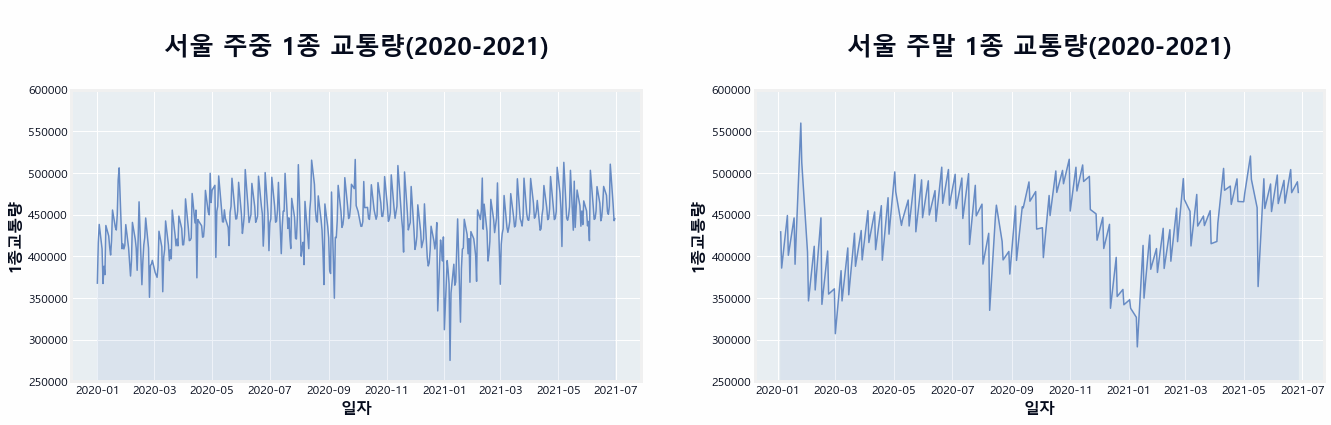

In [32]:
# Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([250000,600000])
    axes[i].grid(color=ColorGrid) 
    
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
    axes[i].set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')


axes[0].set_title('\nÏÑúÏö∏ Ï£ºÏ§ë 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')
axes[1].set_title('\nÏÑúÏö∏ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')

fill_under(sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')|(seoul_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº'))&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1,lw=1.5))

<AxesSubplot:title={'center':'\nÏÑúÏö∏ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

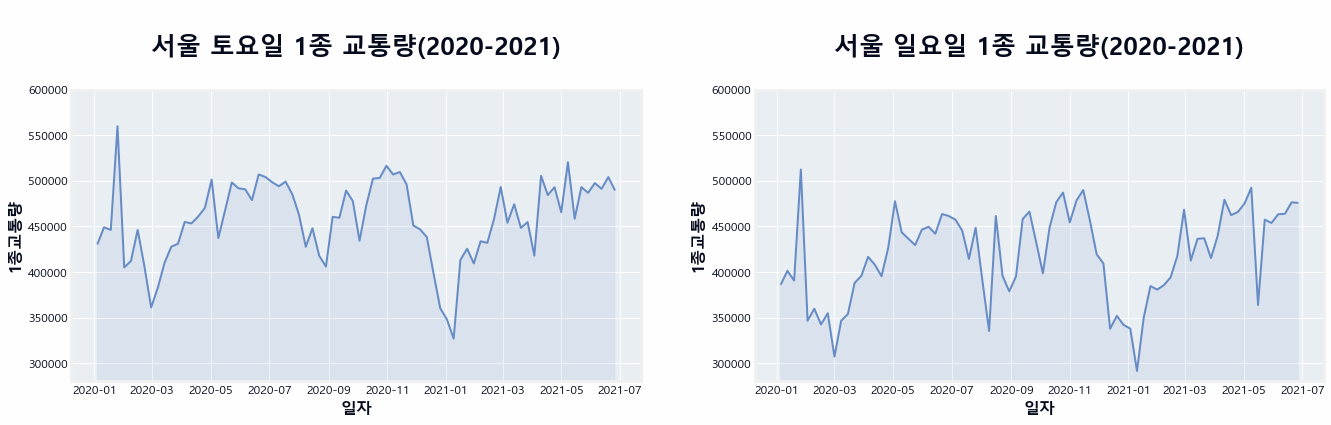

In [33]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([280000,600000])
    axes[i].grid(color=ColorGrid) 
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
    axes[i].set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')


axes[0].set_title('\nÏÑúÏö∏ ÌÜ†ÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')
axes[1].set_title('\nÏÑúÏö∏ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')

fill_under(sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],lw=2,color=ColorLine1))
fill_under(sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],lw=2,color=ColorLine1))


### ÏÑúÏö∏ 2Ï¢Ö ÍµêÌÜµÎüâ

ÏûêÍ∞ÄÏö©Ïù¥ ÏïÑÎãå ÌÉùÎ∞∞ Ï∞®ÎüâÏùÑ ÌôïÏù∏Ìï¥ Î≥¥Ïûê.
Ïø†Ìå°, CJ ÌÉùÎ∞∞ÏôÄ Í∞ôÏùÄ ÌôîÎ¨º Ï∞®ÏñëÏùÄ 2Ï¢Ö Ï∞®ÎüâÏúºÎ°ú Î∂ÑÎ•ò ÎêúÎã§.

<AxesSubplot:title={'center':'\nÏÑúÏö∏ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='2Ï¢ÖÍµêÌÜµÎüâ'>

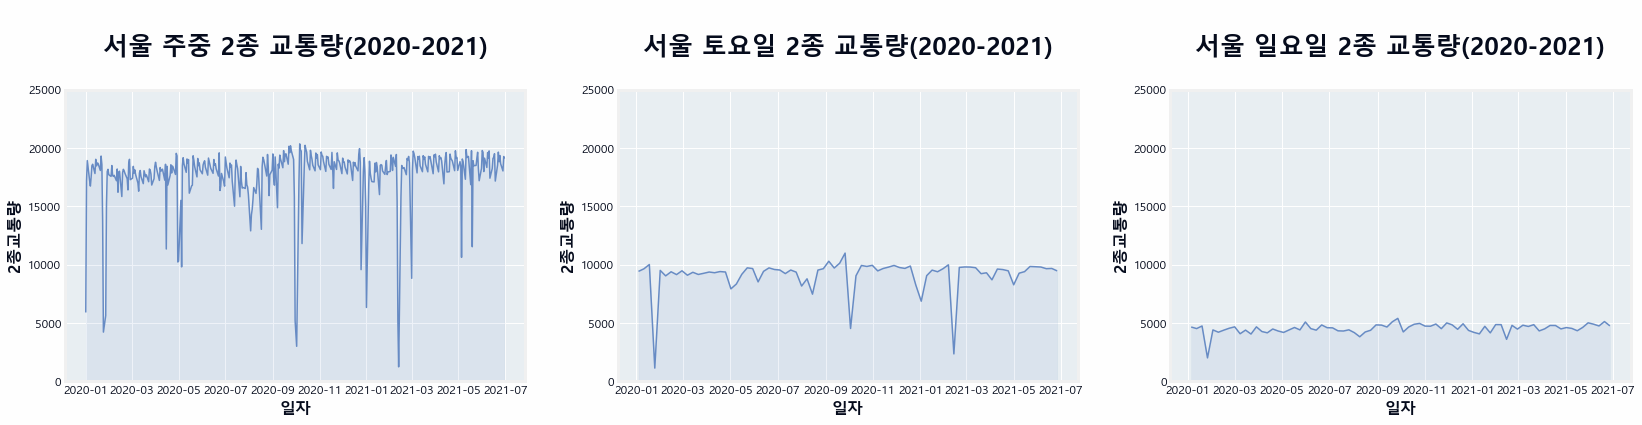

In [34]:
# 2Ï¢Ö ÍµêÌÜµÎüâ(Ï§ëÌòïÏ∞®) Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set_title('\nÏÑúÏö∏ Ï£ºÏ§ë 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')
axes[1].set_title('\nÏÑúÏö∏ ÌÜ†ÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')
axes[2].set_title('\nÏÑúÏö∏ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')

for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([0,25000])
    axes[i].grid(color=ColorGrid)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
    axes[i].set_ylabel('2Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')
    
fill_under(sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[2],color=ColorLine1, linewidth='1.5'))

## ÎåÄÍµ¨ ÍµêÌÜµÎüâ Î∂ÑÏÑù

ÏΩîÎ°úÎÇò 19 1Ï∞® ÎåÄÏú†ÌñâÎ∞úÎ∞ú ÏßÄÏó≠Ïù∏ ÎåÄÍµ¨Î•º Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÇ¥Ìé¥ Î≥¥Ïûê.

In [35]:
daegu_traffic_data=traffic_data[(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÏÑúÎåÄÍµ¨')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÎÇ®ÎåÄÍµ¨')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='Î∂ÅÎåÄÍµ¨')].groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()
daegu_traffic_data=day_of_week(daegu_traffic_data)
daegu_traffic_data.head()

1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ    Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî   ÏöîÏùº
ÏßëÍ≥ÑÏùºÏûê                                                                       
2018-01-01  158432   1384   3607    712    516   5847  170498  2018  1  ÏõîÏöîÏùº
2018-01-02  161220   6162   7056   3431   3685   7883  189437  2018  1  ÌôîÏöîÏùº
2018-01-03  160008   7111   8303   4490   4598   7705  192215  2018  1  ÏàòÏöîÏùº
2018-01-04  161046   6983   8325   4443   4951   7736  193484  2018  1  Î™©ÏöîÏùº
2018-01-05  174056   7281   8340   4325   5110   8321  207433  2018  1  Í∏àÏöîÏùº

### ÎåÄÍµ¨ 1Ï¢Ö ÍµêÌÜµÎüâ Î∂ÑÏÑù

<AxesSubplot:title={'center':'\nÎåÄÍµ¨ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

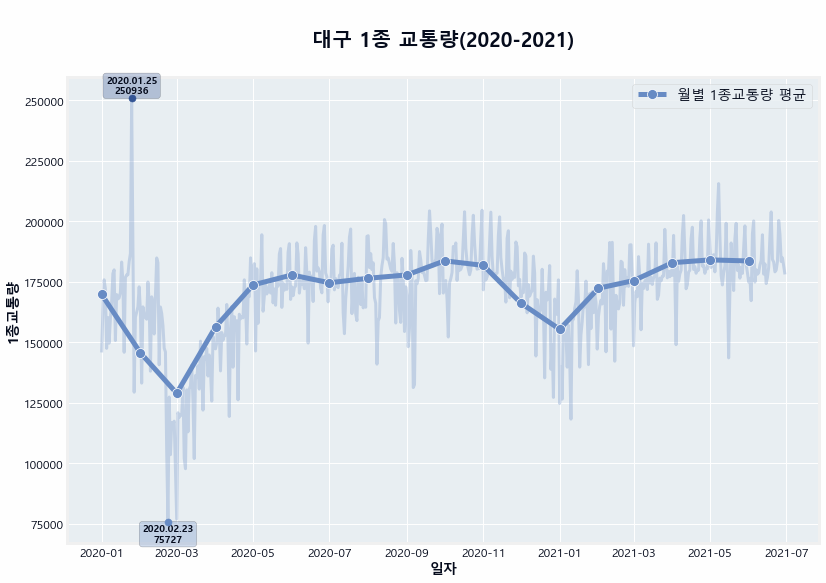

In [36]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûêÍ∞ÄÏö©) Î∂ÑÏÑù 

data=pd.DataFrame(daegu_traffic_data[((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['1Ï¢ÖÍµêÌÜµÎüâ'].mean())
time=[]
for i in range(len(data.index)):
    time.append(str(data.index[i][0])+'-'+str(data.index[i][1])+'-1')
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')


plt.figure(figsize=(12,8)) 

plt.grid(color=ColorGrid) 
plt.title('\nÎåÄÍµ¨ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', weight='bold')
plt.margins(x=0.05,y=0.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('ÏùºÏûê',fontdict={'weight': 'bold', 'size': 14})
plt.ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontdict={'weight': 'bold', 'size': 14})
ax=plt.gca()
ax=pointing(daegu_traffic_data[(daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021)].index,daegu_traffic_data[(daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021)]['1Ï¢ÖÍµêÌÜµÎüâ'],[0,78],ax,True,1000,10)
ax=pointing(daegu_traffic_data[(daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021)].index,daegu_traffic_data[(daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021)]['1Ï¢ÖÍµêÌÜµÎüâ'],[0,-1],ax,False,1000,10)

sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1, alpha=0.3, linewidth='3')
sns.lineplot(data=data, x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1,linewidth='5',marker='o',markersize=10,label='ÏõîÎ≥Ñ 1Ï¢ÖÍµêÌÜµÎüâ ÌèâÍ∑†')

<AxesSubplot:title={'center':'\nÎåÄÍµ¨ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

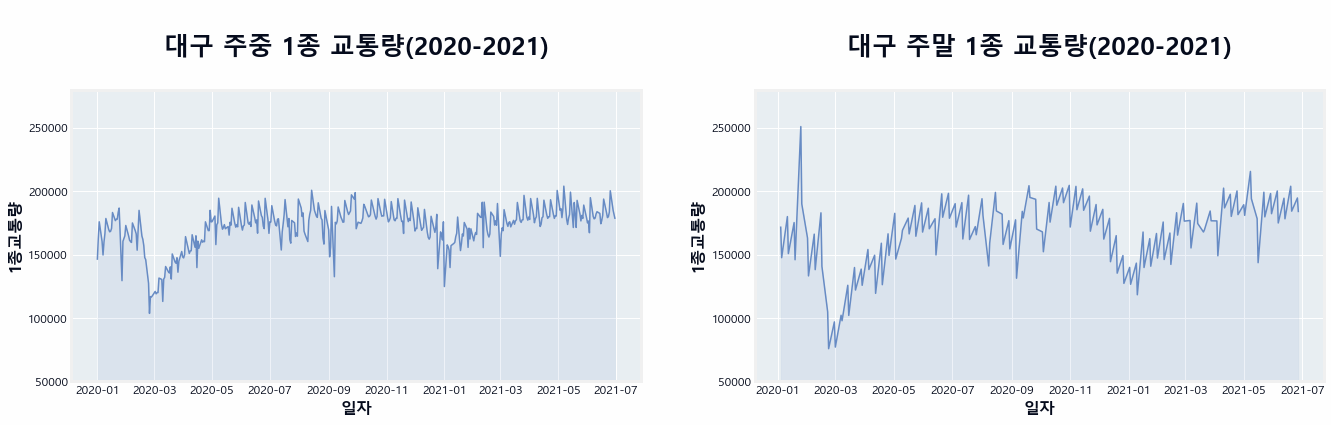

In [37]:
# Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([50000,280000])
    axes[i].grid(color=ColorGrid) 
    
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
    axes[i].set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')


axes[0].set_title('\nÎåÄÍµ¨ Ï£ºÏ§ë 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')
axes[1].set_title('\nÎåÄÍµ¨ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n',fontsize=25,weight='bold')

fill_under(sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')|(daegu_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº'))&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1,lw=1.5))

<AxesSubplot:title={'center':'\nÎåÄÍµ¨ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

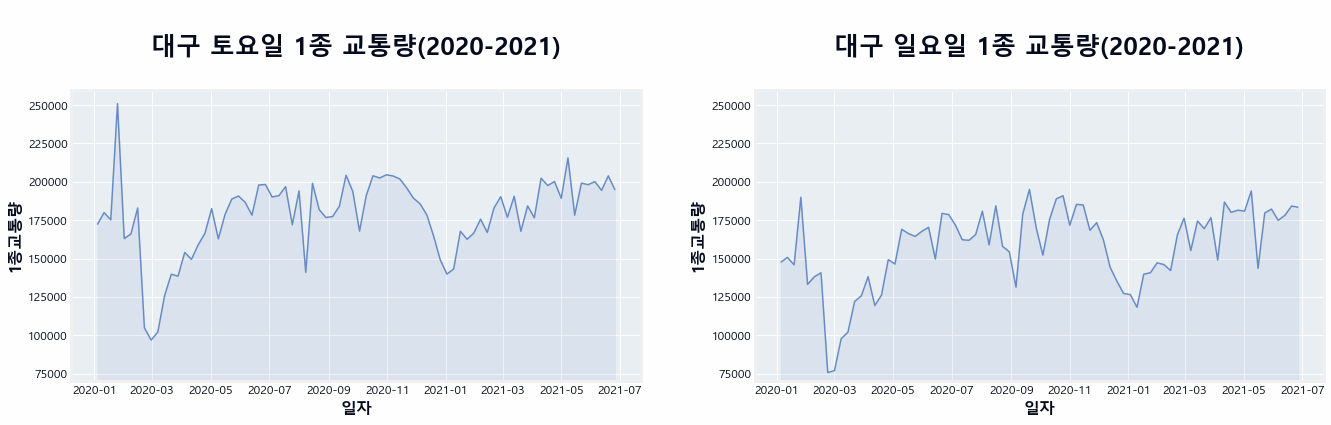

In [38]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(Ï§ëÌòïÏ∞®) Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)


axes[0].set_title('\nÎåÄÍµ¨ ÌÜ†ÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', fontsize=25, weight='bold')
axes[1].set_title('\nÎåÄÍµ¨ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', fontsize=25, weight='bold')

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([70000,260000])
    axes[i].grid(color=ColorGrid)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
    axes[i].set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')
    
fill_under(sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1, linewidth='1.5'))

### ÎåÄÍµ¨ 2Ï¢Ö ÍµêÌÜµÎüâ Î∂ÑÏÑù

<AxesSubplot:title={'center':'\nÎåÄÍµ¨ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n'}, xlabel='ÏùºÏûê', ylabel='2Ï¢ÖÍµêÌÜµÎüâ'>

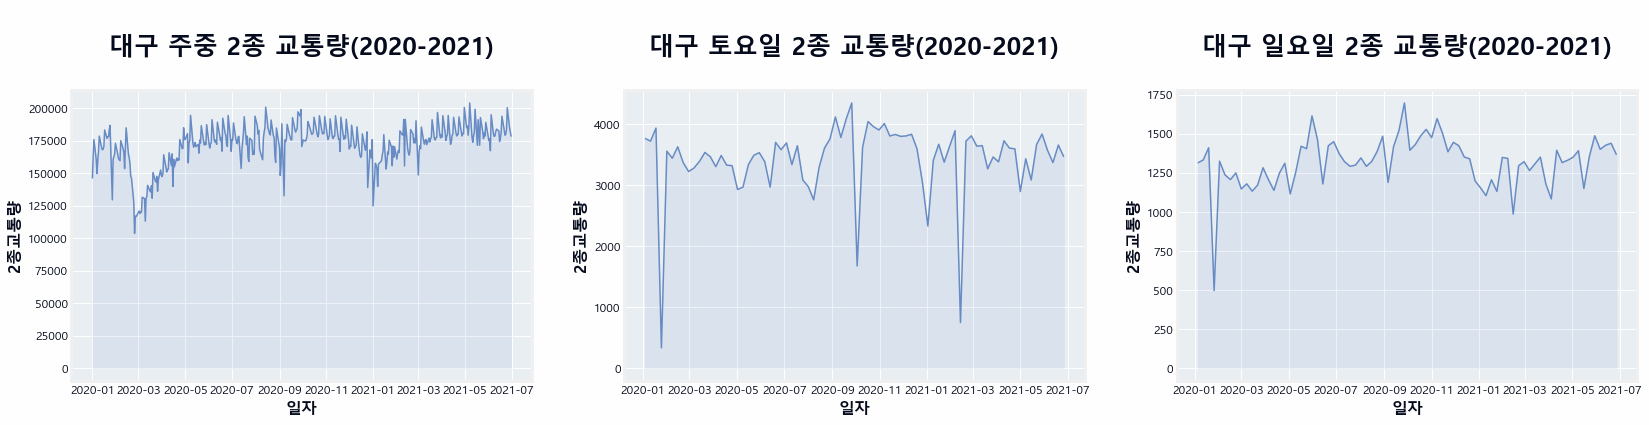

In [39]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(Ï§ëÌòïÏ∞®) Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set_title('\nÎåÄÍµ¨ Ï£ºÏ§ë 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', fontsize=25, weight='bold')
axes[1].set_title('\nÎåÄÍµ¨ ÌÜ†ÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', fontsize=25, weight='bold')
axes[2].set_title('\nÎåÄÍµ¨ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)\n', fontsize=25, weight='bold')

for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].grid(color=ColorGrid)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
    axes[i].set_ylabel('2Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')
    
fill_under(sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1, linewidth='1.5'))
fill_under(sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[2],color=ColorLine1, linewidth='1.5'))

# ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê VS ÍµêÌÜµÎüâ

Ï†ÑÍµ≠Ï†ÅÏúºÎ°ú ÎòêÎäî ÏßÄÏó≠Î≥ÑÎ°ú ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê ÏàòÏôÄ ÍµêÌÜµÎüâÏùò Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï¥Î≥¥Ïûê

In [40]:
covid_traffic=covid_data_new.join(traffic_data_total['1Ï¢ÖÍµêÌÜµÎüâ'],how='inner')
covid_traffic['ÏùºÏûê']=covid_traffic.index
covid_traffic.head()

ÏùºÎ≥ÑÌôïÏßÑÏûê   ÎàÑÏ†ÅÌôïÏßÑÏûê   ÎàÑÏ†ÅÏÇ¨ÎßùÏûê    ÎÖÑÎèÑ  Ïõî    1Ï¢ÖÍµêÌÜµÎüâ         ÏùºÏûê
2021-06-30  761.0  156960  2018.0  2021  6  5761122 2021-06-30
2021-06-29  794.0  156166  2017.0  2021  6  5795714 2021-06-29
2021-06-28  595.0  155571  2015.0  2021  6  5983959 2021-06-28
2021-06-27  501.0  155070  2013.0  2021  6  6259574 2021-06-27
2021-06-26  614.0  154456  2012.0  2021  6  6655649 2021-06-26

<AxesSubplot:title={'center':'\nÍµêÌÜµÎüâ(1Ï¢Ö) VS COVID19 ÌôïÏßÑÏûê\n'}, xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

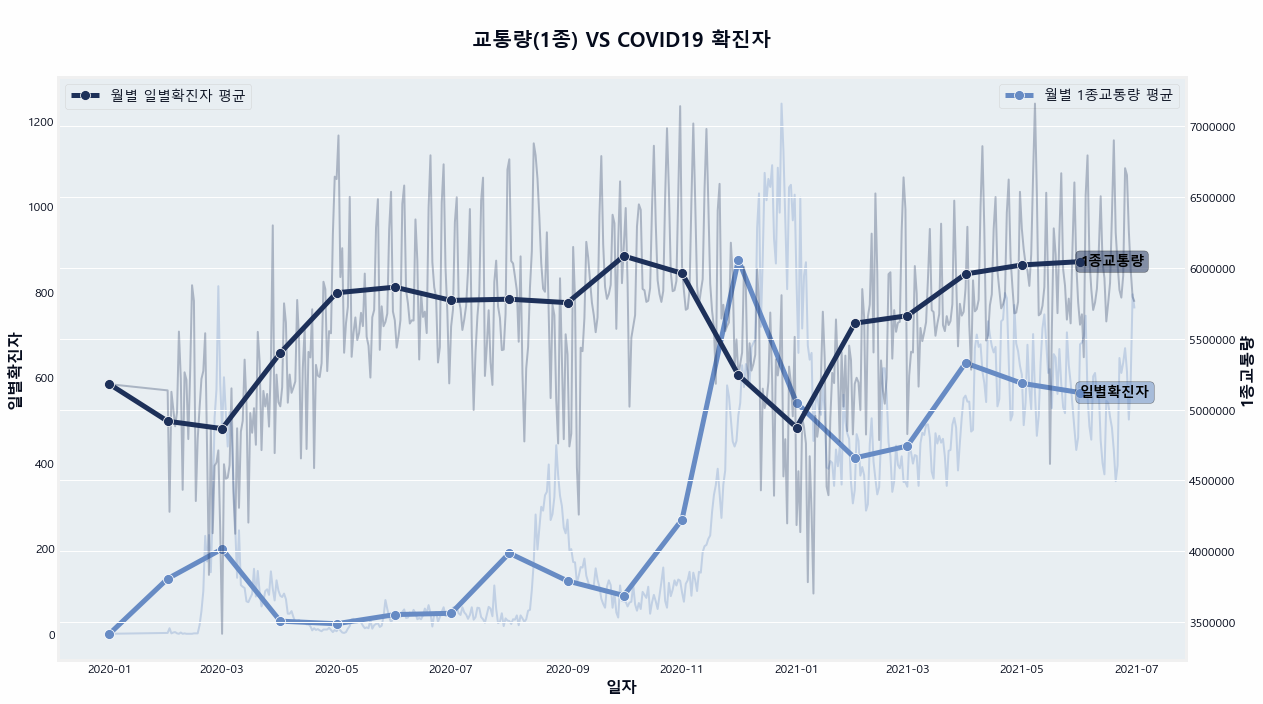

In [41]:
data1=pd.DataFrame(covid_traffic[((covid_traffic.ÎÖÑÎèÑ==2020)|(covid_traffic.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['ÏùºÎ≥ÑÌôïÏßÑÏûê'].mean())
data2=pd.DataFrame(covid_traffic[((covid_traffic.ÎÖÑÎèÑ==2020)|(covid_traffic.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['1Ï¢ÖÍµêÌÜµÎüâ'].mean())
time=[]
for i in range(len(data.index)):
    time.append(str(data.index[i][0])+'-'+str(data.index[i][1])+'-15')
data1['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data1['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')
data2['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data2['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')

fig, ax1=plt.subplots(figsize=(18,10))
ax2=ax1.twinx()
ax1.grid(False)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.grid(color=ColorGrid)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
ax1.set_ylabel('ÏùºÎ≥ÑÌôïÏßÑÏûê',fontsize=16,weight='bold')
ax2.tick_params(axis='y', labelsize=12)
ax2.set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')


plt.title('\nÍµêÌÜµÎüâ(1Ï¢Ö) VS COVID19 ÌôïÏßÑÏûê\n', weight='bold')

x1=list(data1['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'])
y1=list(data1['ÏùºÎ≥ÑÌôïÏßÑÏûê'])

x2=list(data2['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'])
y2=list(data2['1Ï¢ÖÍµêÌÜµÎüâ'])

ax1.text(x1[-1], y1[-1], s='ÏùºÎ≥ÑÌôïÏßÑÏûê', fontweight='bold',
         va='center', ha='left', color='black',  
         bbox=dict(boxstyle='round,pad=0.3', fc=ColorLine1, ec='black', alpha=0.5))

ax2.text(x2[-1], y2[-1], s='1Ï¢ÖÍµêÌÜµÎüâ', fontweight='bold',
         va='center', ha='left', color='black',
         bbox=dict(boxstyle='round,pad=0.3', fc=ColorLine2, ec='black', alpha=0.5))

sns.lineplot(x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',data=covid_traffic,color=ColorLine1, ax=ax1,alpha=0.3, linewidth='2')
sns.lineplot(x='ÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',data=covid_traffic, ax=ax2, color=ColorLine2,alpha=0.3, linewidth='2')
sns.lineplot(x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',data=data1,color=ColorLine1, ax=ax1,marker='o',linewidth='5', markersize=10, label='ÏõîÎ≥Ñ 1Ï¢ÖÍµêÌÜµÎüâ ÌèâÍ∑†')
sns.lineplot(x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='1Ï¢ÖÍµêÌÜµÎüâ',data=data2, ax=ax2, color=ColorLine2 ,marker='o',linewidth='5', markersize=10, label='ÏõîÎ≥Ñ ÏùºÎ≥ÑÌôïÏßÑÏûê ÌèâÍ∑†')

## ÌôïÏßÑÏûê ÏàòÏùò Îã®ÏúÑÎ≥Ñ ÍµêÌÜµÎüâ Î∂ÑÏÑù

Text(0.5, 1.1, '\nÏùºÎ≥ÑÌôïÏßÑÏûêÏôÄ 1Ï¢ÖÍµêÌÜµÎüâÏùò RegPlot\n')

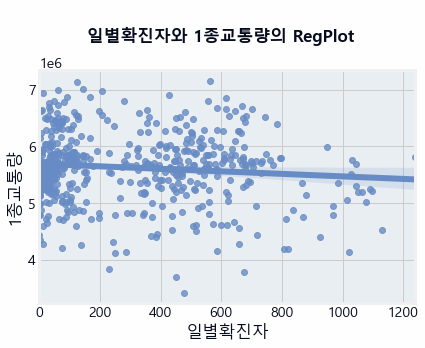

In [42]:
sns.regplot(data=covid_traffic, x='ÏùºÎ≥ÑÌôïÏßÑÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1)
plt.suptitle('\nÏùºÎ≥ÑÌôïÏßÑÏûêÏôÄ 1Ï¢ÖÍµêÌÜµÎüâÏùò RegPlot\n', y=1.1, weight='bold')


## Ïó∞Ìú¥Ï≤† ÍµêÌÜµÎüâ Î∞è ÌôïÏßÑÏûê Ïàò Î∂ÑÏÑù

1Ïõî(Ïó∞Ï¥àÌñâÏÇ¨), 2Ïõî(ÏÑ§), 5Ïõî(Ïñ¥Î¶∞Ïù¥ÎÇ†) Ï§ëÏã¨ÏúºÎ°ú Î∂ÑÏÑù

### 1Î∂ÑÍ∏∞(1Ïõî, 2Ïõî) Î∂ÑÏÑù

In [43]:
#1Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
fitst_traffic_data=pd.concat([traffic_2020_01,traffic_2021_01])

In [44]:
#1Î∂ÑÍ∏∞Îç∞Ïù¥ÌÑ∞ ÎÖÑÎèÑ, Ïõî ÏπºÎüºÏ∂îÍ∞Ä
fitst_traffic_data.index=fitst_traffic_data.ÏßëÍ≥ÑÏùºÏûê
fitst_traffic_data=fitst_traffic_data.drop('ÏßëÍ≥ÑÏùºÏûê',axis=1)
fitst_traffic_data=fitst_traffic_data[['ÏòÅÏóÖÏÜåÎ™Ö','1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ']]
fitst_traffic_data=day_of_week(fitst_traffic_data)

In [45]:
fitst_traffic_data.head()

ÏòÅÏóÖÏÜåÎ™Ö  1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ  Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî  \
ÏßëÍ≥ÑÏùºÏûê                                                                         
2020-01-01     Í∞ÄÎùΩ    147      2      3     13      8      9   182  2020  1   
2020-01-01     Í∞ÄÎùΩ    311      2      9     16     74      8   420  2020  1   
2020-01-01  Í∞ÄÎùΩ(Í∞ú)   1769     20     40     49    120    260  2258  2020  1   
2020-01-01  Í∞ÄÎùΩ(Í∞ú)   8312     26     72     40    499    444  9393  2020  1   
2020-01-01  Í∞ÄÎùΩ(Í∞ú)   2383     33     40     46    141    322  2965  2020  1   

             ÏöîÏùº  
ÏßëÍ≥ÑÏùºÏûê             
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº

#### 1Ïõî Ï§ëÏã¨ Î∂ÑÏÑù

In [46]:
# 2021 1Î∂ÑÍ∏∞Ï§ë 1ÏõîÎ°úÎßå Í∑∏Î£πÌôî
jan_traffic_data=fitst_traffic_data[(fitst_traffic_data['ÎÖÑÎèÑ']==2021)&(fitst_traffic_data['Ïõî']==1)]
jan_traffic_data=jan_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()/(5.691220e+06)
jan_traffic_data=day_of_week(jan_traffic_data)
#2021 1Ïõî ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/1020
jan_covid_data_new=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê']]
jan_covid_data_new.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê']

jan_covid_data_new.index=pd.to_datetime(jan_covid_data_new['ÏùºÏûê'],format='%Y%m%d')
jan_covid_data_new=jan_covid_data_new.drop('ÏùºÏûê',axis=1)
jan_covid_traffic=jan_covid_data_new.join(jan_traffic_data,how='left')
jan_covid_traffic = jan_covid_traffic.dropna(axis=0)
jan_covid_traffic['ÏßëÍ≥ÑÏùºÏûê']=jan_covid_traffic.index
jan_covid_traffic.head()


ÏùºÎ≥ÑÌôïÏßÑÏûê     1Ï¢ÖÍµêÌÜµÎüâ     2Ï¢ÖÍµêÌÜµÎüâ     3Ï¢ÖÍµêÌÜµÎüâ     4Ï¢ÖÍµêÌÜµÎüâ     5Ï¢ÖÍµêÌÜµÎüâ  \
ÏùºÏûê                                                                       
2021-01-31  0.299020  0.847764  0.009649  0.016889  0.009903  0.009623   
2021-01-30  0.347059  0.939827  0.021057  0.026906  0.022306  0.034722   
2021-01-29  0.447059  0.957940  0.038164  0.045617  0.038885  0.055170   
2021-01-28  0.459804  0.851930  0.038533  0.046201  0.042250  0.058366   
2021-01-27  0.487255  0.945442  0.040355  0.047042  0.042991  0.058943   

               6Ï¢ÖÍµêÌÜµÎüâ      Ï¥ùÍµêÌÜµÎüâ      ÎÖÑÎèÑ    Ïõî   ÏöîÏùº       ÏßëÍ≥ÑÏùºÏûê  
ÏùºÏûê                                                           
2021-01-31  0.036125  0.929953  2021.0  1.0  ÏùºÏöîÏùº 2021-01-31  
2021-01-30  0.042135  1.086954  2021.0  1.0  ÌÜ†ÏöîÏùº 2021-01-30  
2021-01-29  0.051361  1.187137  2021.0  1.0  Í∏àÏöîÏùº 2021-01-29  
2021-01-28  0.045590  1.082870  2021.0  1.0  Î™©ÏöîÏùº 2021-01-28  
2021-01-27  0.051469  1.186242  2021.0  1.0  ÏàòÏöîÏùº 2021-01-27

In [47]:
def heat(b):
    a=b.corr()
    a=a.drop(['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ','4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ','Ï¥ùÍµêÌÜµÎüâ'],axis=1)
    a=a.drop(['ÏùºÎ≥ÑÌôïÏßÑÏûê'])
    return a

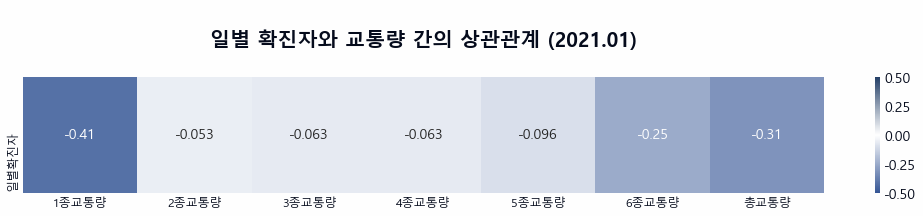

In [48]:
plt.subplots(figsize=(16,2))
jan_covid_traffic_cor=jan_covid_traffic.drop(['ÎÖÑÎèÑ','Ïõî'],axis=1)
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏàòÏπò Í∑∏ÎûòÌîÑ [Correlation Heatmap with Number]
jan_covid_traffic_cor=heat(jan_covid_traffic_cor)
jan_covid_traffic_cor=jan_covid_traffic_cor.T
sns.heatmap(jan_covid_traffic_cor, vmin=-0.5, vmax=0.5, annot=True,cmap=double2)
plt.title('\nÏùºÎ≥Ñ ÌôïÏßÑÏûêÏôÄ ÍµêÌÜµÎüâ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (2021.01)\n', weight='bold')

plt.margins(x=0.05,y=0.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

1Ï¢Ö ÍµêÌÜµÎüâÍ≥º ÏùºÎ≥Ñ ÌôïÏßÑÏûê ÏàòÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÏùÑÎïå ÎπÑÍµêÏ†Å ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäîÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
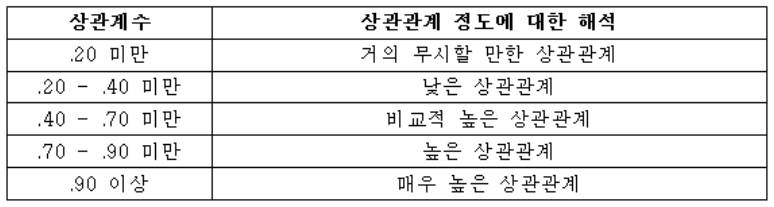



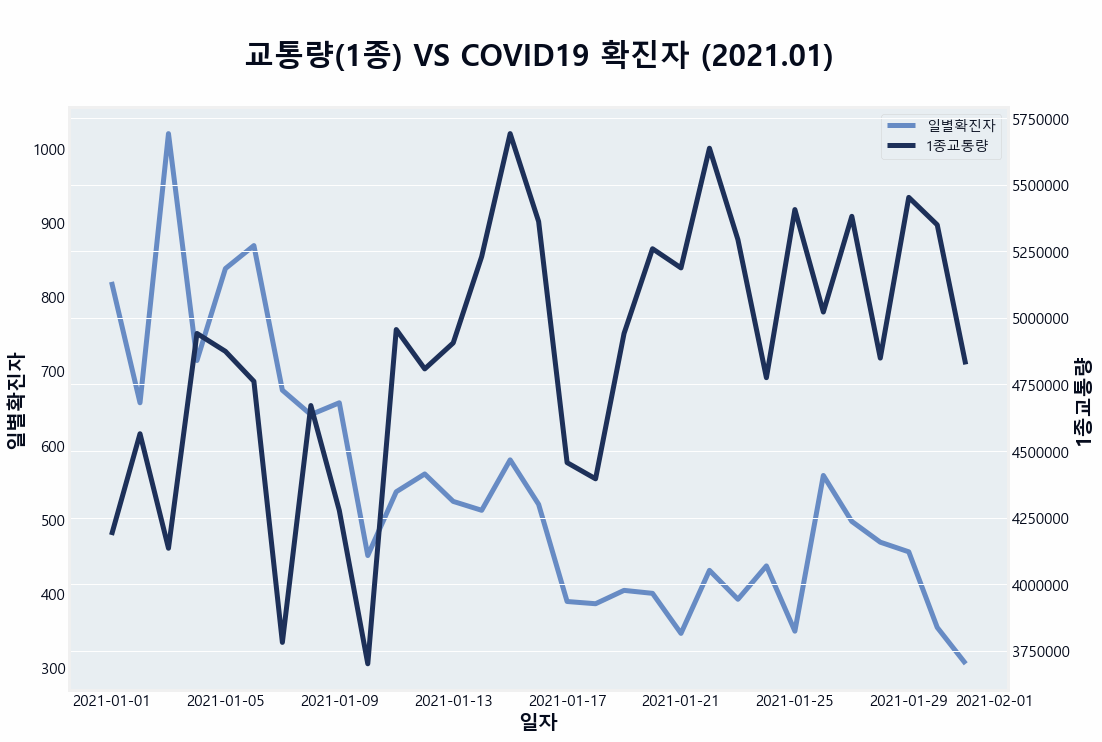

In [49]:
# 2021.01 1Ï¢ÖÍµêÌÜµÎüâVSÌôïÏßÑÏûêÏàò

fig, ax1=plt.subplots(figsize=(15,10))
ax2=ax1.twinx()
ax1.grid(False)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.grid(color=ColorGrid)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_xlabel('ÏùºÏûê',fontsize=20,weight='bold')
ax1.set_ylabel('ÏùºÎ≥ÑÌôïÏßÑÏûê',fontsize=20,weight='bold')
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=20,weight='bold')


plt.title('\nÍµêÌÜµÎüâ(1Ï¢Ö) VS COVID19 ÌôïÏßÑÏûê (2021.01)\n', weight='bold', size=30)


l1=ax1.plot('ÏùºÏûê', 'ÏùºÎ≥ÑÌôïÏßÑÏûê',data=covid_traffic[(covid_traffic.ÎÖÑÎèÑ==2021)&(covid_traffic.Ïõî==1)],color=ColorLine1, linewidth='5', label='ÏùºÎ≥ÑÌôïÏßÑÏûê')
l2=ax2.plot('ÏùºÏûê', '1Ï¢ÖÍµêÌÜµÎüâ',data=covid_traffic[(covid_traffic.ÎÖÑÎèÑ==2021)&(covid_traffic.Ïõî==1)], color=ColorLine2, linewidth='5', label='1Ï§ëÍµêÌÜµÎüâ')

„Ö£=l1+l2
ax1.legend(„Ö£, ['ÏùºÎ≥ÑÌôïÏßÑÏûê','1Ï¢ÖÍµêÌÜµÎüâ'])

#### 2Ïõî Ï§ëÏã¨ Î∂ÑÏÑù

In [50]:
# 2020 1Î∂ÑÍ∏∞Ï§ë 2ÏõîÎ°úÎßå Í∑∏Î£πÌôî

feb_traffic_data=fitst_traffic_data[(fitst_traffic_data['ÎÖÑÎèÑ']==2020)&(fitst_traffic_data['Ïõî']==2)]
feb_traffic_data=feb_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()/(5.877788e+06)


# 2021 1Î∂ÑÍ∏∞Ï§ë 2ÏõîÎ°úÎßå Í∑∏Î£πÌôî

lastfeb_traffic_data=fitst_traffic_data[(fitst_traffic_data['ÎÖÑÎèÑ']==2021)&(fitst_traffic_data['Ïõî']==2)]
lastfeb_traffic_data=lastfeb_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()/(6.639591e+06)


In [51]:
#2020 2Ïõî ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/813
feb_covid_data_new=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê']]
feb_covid_data_new.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê']
feb_covid_data_new.index=pd.to_datetime(feb_covid_data_new['ÏùºÏûê'],format='%Y%m%d')


#2021 2Ïõî ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/621
lastfeb_covid_data_n=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê']]
lastfeb_covid_data_n.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê']
lastfeb_covid_data_n.index=pd.to_datetime(lastfeb_covid_data_n['ÏùºÏûê'],format='%Y%m%d')


In [52]:
feb_2020_covid_traffic=feb_traffic_data.join(feb_covid_data_new['ÏùºÎ≥ÑÌôïÏßÑÏûê'], how='inner')
feb_2021_covid_traffic=lastfeb_traffic_data.join(lastfeb_covid_data_n['ÏùºÎ≥ÑÌôïÏßÑÏûê'], how='inner')

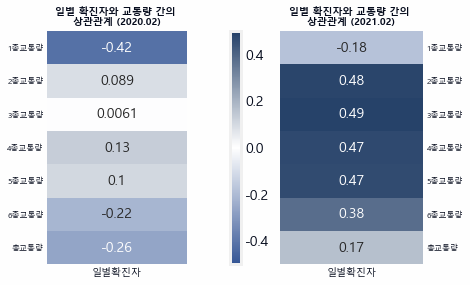

In [53]:
feb_2020_covid_traffic_heat=heat(feb_2020_covid_traffic)
feb_2021_covid_traffic_heat=heat(feb_2021_covid_traffic)

fig, (ax,ax2) = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [3, 2]})
fig.subplots_adjust(wspace=0.1)

ax2.set_title('ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏôÄ ÍµêÌÜµÎüâ Í∞ÑÏùò \nÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (2021.02)', fontsize=10, weight='bold')
ax.set_title('ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏôÄ ÍµêÌÜµÎüâ Í∞ÑÏùò \nÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (2020.02)', fontsize=10, weight='bold')
ax=sns.heatmap(feb_2020_covid_traffic_heat, vmin=-0.5, vmax=0.5, cmap=double2, ax=ax, cbar=False,annot=True)
fig.colorbar(ax.collections[0], ax=ax,location='right',use_gridspec=False, pad=0.2)
ax2=sns.heatmap(feb_2021_covid_traffic_heat, vmin=-0.5, vmax=0.5, cmap=double2, ax=ax2, cbar=False,annot=True)
ax.set_xticklabels(ax.get_xmajorticklabels(),fontsize=10)
ax2.set_xticklabels(ax2.get_xmajorticklabels(),fontsize=10)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 8)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 8)
plt.show()

In [54]:
feb_2020_covid_traffic['ÏöîÏùº']=feb_2020_covid_traffic.index
feb_2021_covid_traffic['ÏöîÏùº']=feb_2021_covid_traffic.index
feb_2021_covid_traffic.head()

1Ï¢ÖÍµêÌÜµÎüâ     2Ï¢ÖÍµêÌÜµÎüâ     3Ï¢ÖÍµêÌÜµÎüâ     4Ï¢ÖÍµêÌÜµÎüâ     5Ï¢ÖÍµêÌÜµÎüâ     6Ï¢ÖÍµêÌÜµÎüâ  \
2021-02-01  0.780393  0.032268  0.037997  0.032387  0.045009  0.043072   
2021-02-02  0.786890  0.035401  0.040843  0.038070  0.051677  0.042959   
2021-02-03  0.781969  0.034858  0.040817  0.038502  0.052838  0.042151   
2021-02-04  0.752439  0.033535  0.039756  0.036923  0.050278  0.040003   
2021-02-05  0.881208  0.035219  0.041369  0.037873  0.053373  0.046230   

                Ï¥ùÍµêÌÜµÎüâ     ÏùºÎ≥ÑÌôïÏßÑÏûê         ÏöîÏùº  
2021-02-01  0.971127  0.541063 2021-02-01  
2021-02-02  0.995841  0.752013 2021-02-02  
2021-02-03  0.991135  0.726248 2021-02-03  
2021-02-04  0.952934  0.595813 2021-02-04  
2021-02-05  1.095271  0.628019 2021-02-05

Text(0.5, 0.98, '\n2020ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢Ö,ÏùºÎ≥ÑÌôïÏßÑÏûê ÎπÑÍµê\n')

<Figure size 432x288 with 0 Axes>

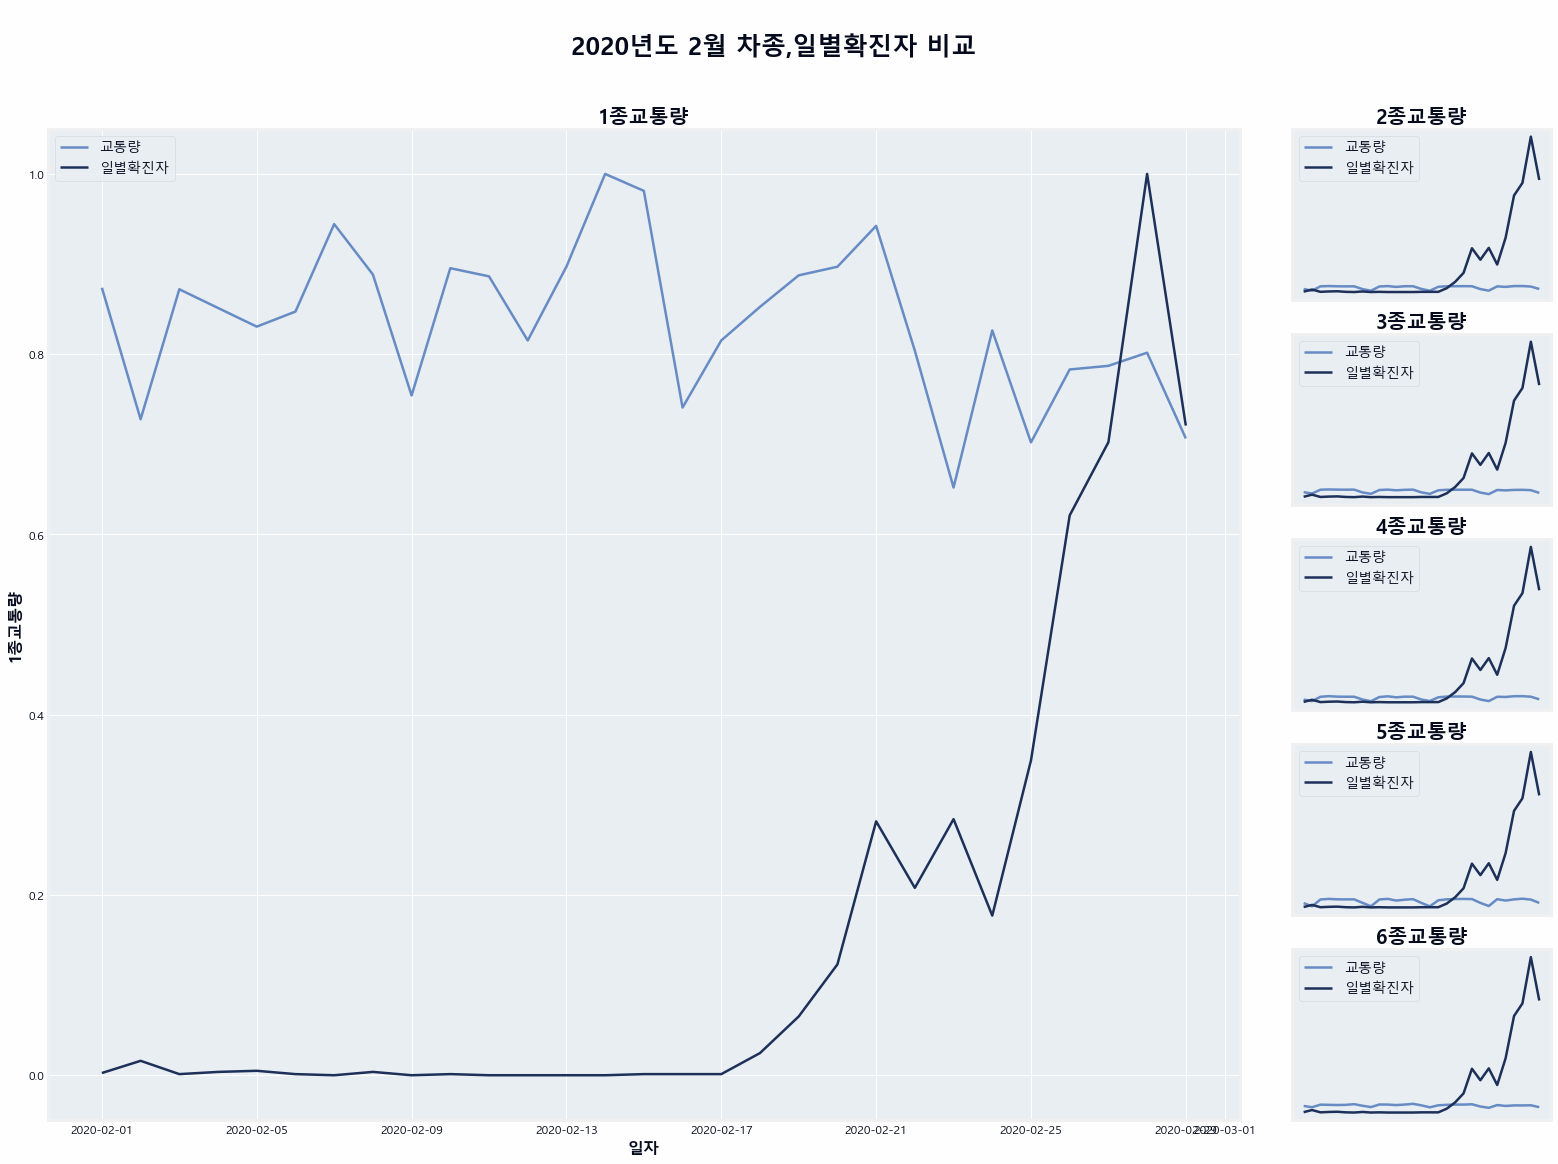

In [55]:
# 2020ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢ÖvsÏùºÎ≥ÑÌôïÏßÑÏûê Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
traffic=['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ','4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ']
plt.figure(0)
plt.figure(figsize=(24,17))
ax1 = plt.subplot2grid((5,5), (0,0), colspan=4,rowspan=5)
ax2 = plt.subplot2grid((5,5), (0,4), rowspan=1)
ax3 = plt.subplot2grid((5,5), (1,4), rowspan=1)
ax4 = plt.subplot2grid((5,5), (2,4), rowspan=1)
ax5 = plt.subplot2grid((5,5), (3,4), rowspan=1)
ax6 = plt.subplot2grid((5,5), (4,4), rowspan=1)
axis_t=[ax1,ax2,ax3,ax4,ax5,ax6]

for idx,i in enumerate(axis_t):
    i.grid(color=ColorGrid) 
    if idx>=1:
        i.set_xticks([])
        i.set_yticks([])
    if idx==0:
        i.tick_params(axis='x', labelsize=12)
        i.tick_params(axis='y', labelsize=12)
        i.set_xlabel('ÏùºÏûê',fontsize=16,weight='bold')
        i.set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=16,weight='bold')
    sns.lineplot(x='ÏöîÏùº', y=traffic[idx], data=feb_2020_covid_traffic,ax=i,color=ColorLine1, linewidth='2.5',label='ÍµêÌÜµÎüâ')
    i.set_title(traffic[idx], weight='bold', size=20)
    sns.lineplot(x='ÏöîÏùº', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', data=feb_2020_covid_traffic,ax=i,color=ColorLine2, linewidth='2.5',label='ÏùºÎ≥ÑÌôïÏßÑÏûê')
    
plt.suptitle('\n2020ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢Ö,ÏùºÎ≥ÑÌôïÏßÑÏûê ÎπÑÍµê\n',weight='bold', fontsize=25)

<Figure size 432x288 with 0 Axes>

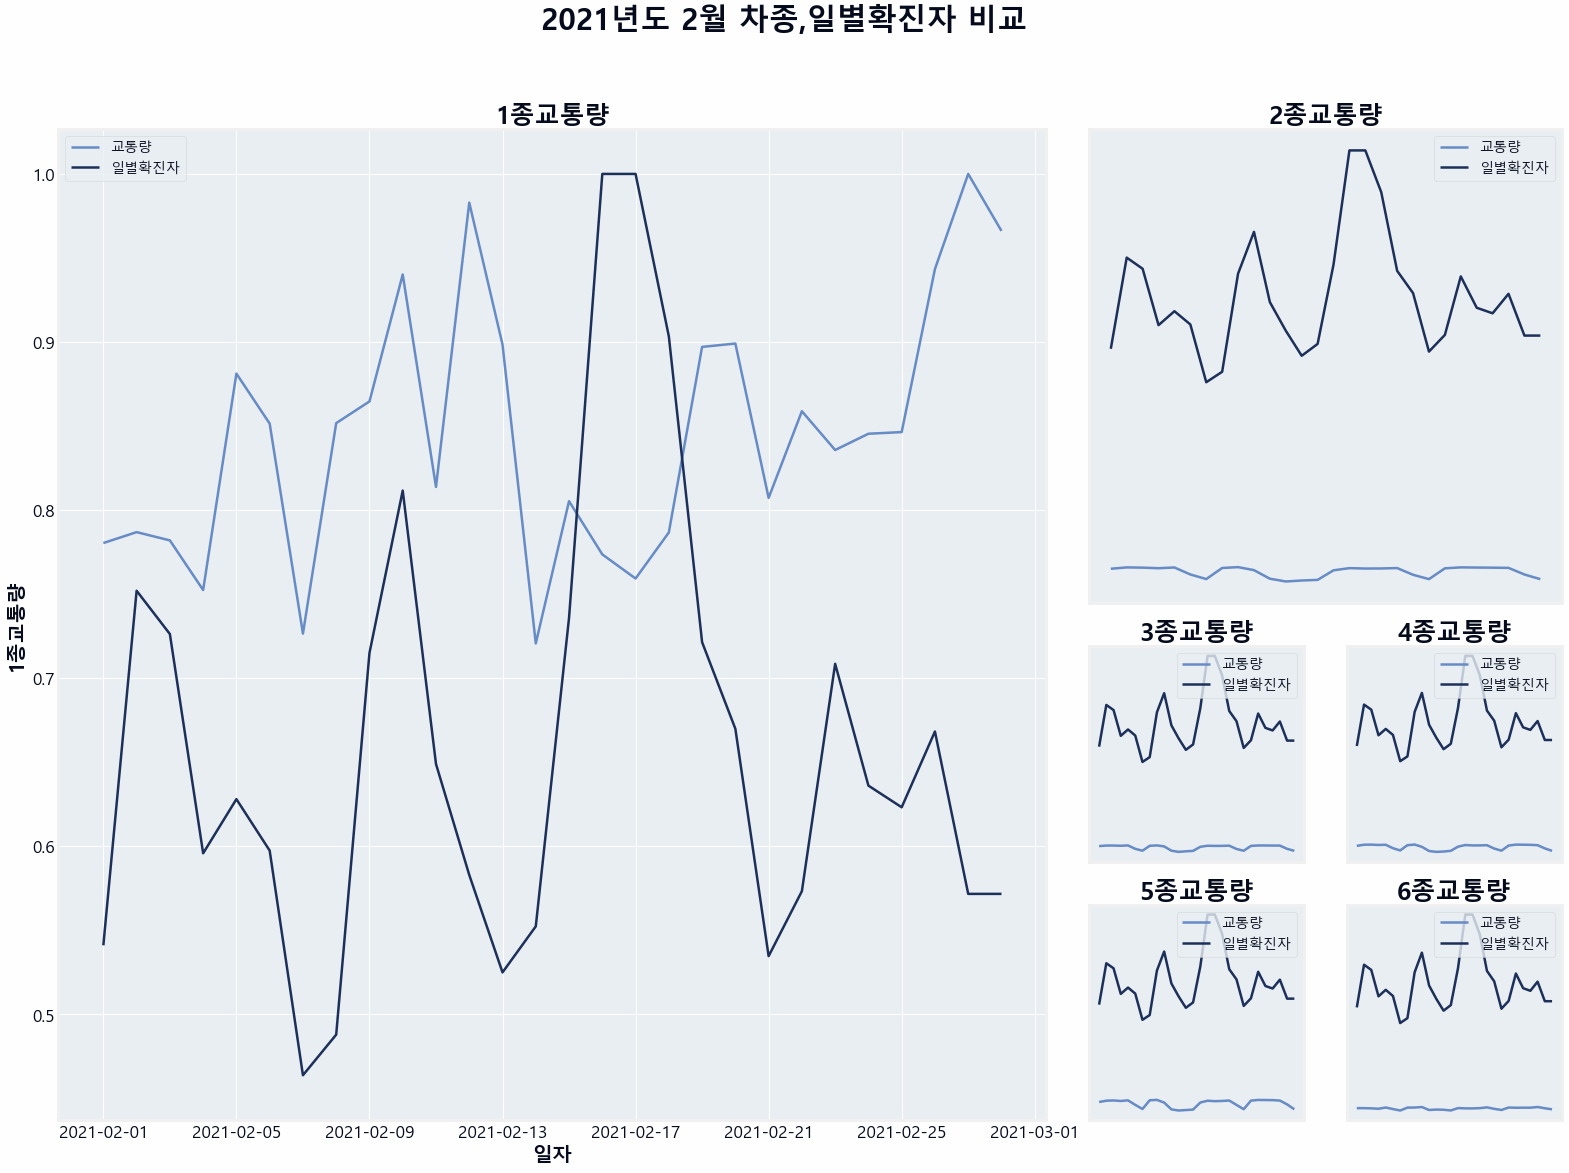

In [56]:
## 2021ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢ÖvsÏùºÎ≥ÑÌôïÏßÑÏûê Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
traffic=['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ','4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ']
a=[ax1,ax2,ax3,ax4,ax5,ax6]
plt.figure(0)
plt.figure(figsize=(24,17))
ax1 = plt.subplot2grid((4,6), (0,0), colspan=4,rowspan=4)
ax2 = plt.subplot2grid((4,6), (0,4), colspan=2,rowspan=2)
ax3 = plt.subplot2grid((4,6), (2,4), rowspan=1)
ax4 = plt.subplot2grid((4,6), (2,5), rowspan=1)
ax5 = plt.subplot2grid((4,6), (3,4), rowspan=1)
ax6 = plt.subplot2grid((4,6), (3,5), rowspan=1)
axis_t=[ax1,ax2,ax3,ax4,ax5,ax6]

for idx,i in enumerate(axis_t):
    i.grid(color=ColorGrid) 
    if idx>=1:
        i.set_xticks([])
        i.set_yticks([])
    if idx==0:
        i.tick_params(axis='x', labelsize=17)
        i.tick_params(axis='y', labelsize=17)
        i.set_xlabel('ÏùºÏûê',fontsize=20,weight='bold')
        i.set_ylabel('1Ï¢ÖÍµêÌÜµÎüâ',fontsize=20,weight='bold')
    w=sns.lineplot(x='ÏöîÏùº', y=traffic[idx], data=feb_2021_covid_traffic,ax=i,color=ColorLine1, linewidth='2.5',label='ÍµêÌÜµÎüâ')
    i.set_title(traffic[idx], weight='bold', size=25)
    w2=sns.lineplot(x='ÏöîÏùº', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', data=feb_2021_covid_traffic,ax=i,color=ColorLine2, linewidth='2.5',label='ÏùºÎ≥ÑÌôïÏßÑÏûê')
plt.suptitle('2021ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢Ö,ÏùºÎ≥ÑÌôïÏßÑÏûê ÎπÑÍµê',fontsize=30, weight='bold')
fig.tight_layout()

# ü§¶‚Äç‚ôÄÔ∏èü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äç
